1. Prepare a data quality report for your CSV file. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading from a csv file, into a data frame
df = pd.read_csv('covid19-cdc-22208104.csv', keep_default_na=True, delimiter=',', engine='python', skipinitialspace=True)

Shape of data frame
Display number of rows and columns- 20000 = Rows, 19 = columns

In [3]:
#How many rows/instances?
df.shape[0]

20000

In [4]:
#How many columns/features?
df.shape[1]

19

In [5]:
# Show the data types in each column.
# Some of the type 'object' columns may be more appropriate as continuous or as categorical types.
# We first explore the data, then decide which columns should be treated as 'continuous' and which should be treated as 'categorical'.
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [6]:
#another way to get a summary of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       20000 non-null  object 
 1   res_state                        19999 non-null  object 
 2   state_fips_code                  19999 non-null  float64
 3   res_county                       18841 non-null  object 
 4   county_fips_code                 18841 non-null  float64
 5   age_group                        19873 non-null  object 
 6   sex                              19599 non-null  object 
 7   race                             17663 non-null  object 
 8   ethnicity                        17442 non-null  object 
 9   case_positive_specimen_interval  10491 non-null  float64
 10  case_onset_interval              8804 non-null   float64
 11  process                          20000 non-null  object 
 12  exposure_yn       

Print the first and the last 5 rows.

In [7]:
#First five rows
#Use .T to transpose index and columns of the data frame so it fits
df.head(5).T

,0,1,2,3,4
case_month,2021-04,2020-04,2020-11,2021-12,2022-01
res_state,IL,MA,PA,NY,AZ
state_fips_code,17.0,25.0,42.0,36.0,4.0
res_county,COOK,SUFFOLK,PHILADELPHIA,QUEENS,MARICOPA
county_fips_code,17031.0,25025.0,42101.0,36081.0,4013.0
age_group,50 to 64 years,65+ years,65+ years,65+ years,65+ years
sex,Male,Male,Female,Female,Male
race,White,White,White,Asian,White
ethnicity,Hispanic/Latino,Non-Hispanic/Latino,Unknown,Non-Hispanic/Latino,Non-Hispanic/Latino
case_positive_specimen_interval,1.0,0.0,0.0,0.0,NaN


In [8]:
#Last Five rows
df.tail(5).T

,19995,19996,19997,19998,19999
case_month,2020-07,2021-11,2020-09,2022-03,2021-01
res_state,ID,MI,NC,NY,FL
state_fips_code,16.0,26.0,37.0,36.0,12.0
res_county,JEFFERSON,LAPEER,GUILFORD,DUTCHESS,PINELLAS
county_fips_code,16051.0,26087.0,37081.0,36027.0,12103.0
age_group,18 to 49 years,18 to 49 years,18 to 49 years,18 to 49 years,50 to 64 years
sex,Female,Male,Male,Female,Male
race,White,White,Unknown,White,White
ethnicity,Non-Hispanic/Latino,Non-Hispanic/Latino,Unknown,Unknown,Non-Hispanic/Latino
case_positive_specimen_interval,NaN,NaN,0.0,NaN,NaN


In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
state_fips_code,19999.0,29.556728,13.342128,1.0,19.0,34.0,37.0,78.0
county_fips_code,18841.0,29594.035879,13209.123559,1001.0,18163.0,34017.0,37183.0,56039.0
case_positive_specimen_interval,10491.0,0.188352,2.505358,-90.0,0.0,0.0,0.0,94.0
case_onset_interval,8804.0,-0.047933,2.105525,-60.0,0.0,0.0,0.0,69.0


In [10]:
# Look at column names. Ensure there are not spaces in or after the name
df.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [11]:
county_counts = df.groupby('res_county')['county_fips_code'].nunique()
county_counts[county_counts > 1]

res_county
ADAMS        4
ALBANY       2
ALLEGANY     2
ALLEN        3
ANDERSON     4
            ..
WILSON       2
WINNEBAGO    2
WORCESTER    2
WYOMING      2
YORK         3
Name: county_fips_code, Length: 148, dtype: int64

In [12]:
state_county_fips_counts = df.groupby(['res_state', 'res_county'])['county_fips_code'].nunique()
state_county_fips_counts = state_county_fips_counts[state_county_fips_counts > 1]
if not state_county_fips_counts.empty:
    print("The following counties in the same state have different county FIPS codes:\n")
    print(state_county_fips_counts)
else:
    print("All counties in each state have the same county FIPS code.")


All counties in each state have the same county FIPS code.


In [13]:
county_state_counts = df.groupby('res_county')['state_fips_code'].nunique()
if (county_state_counts > 1).any():
    print("There are counties with more than one state FIPS code.")
else:
    print("There are no counties with more than one state FIPS code.")


There are counties with more than one state FIPS code.


In [14]:
df['case_positive_specimen_interval'] = df['case_positive_specimen_interval'].abs()

In [15]:
df['case_onset_interval'] = df['case_onset_interval'].abs()

In [16]:
# Validity test
valid_positive_speciman_interval = df['case_positive_specimen_interval'].between(0, 60)
valid_onset_interval = df['case_onset_interval'].between(0, 60)

# Completeness test
missing_county_fips = df['county_fips_code'].isna().sum()
missing_state_fips = df['state_fips_code'].isna().sum()

# Uniqueness test
unique_county_state_pairs = df.groupby(['county_fips_code', 'state_fips_code']).size().reset_index(name='counts')
non_unique_county_state_pairs = unique_county_state_pairs[unique_county_state_pairs['counts'] > 1]

# Print the results
print(f'Validity check for case_positive_specimen_interval: {valid_positive_speciman_interval.all()} ({len(df) - valid_positive_speciman_interval.sum()} times False)')
print(f'Validity check for case_onset_interval: {valid_onset_interval.all()} ({len(df) - valid_onset_interval.sum()} times False)')
print(f'Completeness check for county_fips_code: {missing_county_fips == 0}')
print(f'Completeness check for state_fips_code: {missing_state_fips == 0}')
print(f'Uniqueness check for county_fips_code and state_fips_code: {non_unique_county_state_pairs.empty}')


Validity check for case_positive_specimen_interval: False (9512 times False)
Validity check for case_onset_interval: False (11197 times False)
Completeness check for county_fips_code: False
Completeness check for state_fips_code: False
Uniqueness check for county_fips_code and state_fips_code: False


In [17]:
#I decided to drop the below two columns as they are effectively duplicates of state and county
df = df.drop('state_fips_code', axis=1)
df = df.drop('county_fips_code', axis=1)

Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types).

In [18]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['case_month', 'res_state', 'res_county', 'age_group', 'sex', 'race',
       'ethnicity', 'process', 'exposure_yn', 'current_status',
       'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn',
       'underlying_conditions_yn'],
      dtype='object')

In [19]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes  

case_month                         category
res_state                          category
res_county                         category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

In [20]:
#Update the numeric features, after converting.
numeric_columns = df.select_dtypes(['float64']).columns
numeric_columns

Index(['case_positive_specimen_interval', 'case_onset_interval'], dtype='object')

In [21]:
#Look at the categorical features only
category_columns = df.select_dtypes(['category']).columns
df[category_columns].T

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
case_month,2021-04,2020-04,2020-11,2021-12,2022-01,2020-12,2021-01,2020-12,2020-04,2020-11,...,2020-11,2021-02,2022-08,2022-04,2020-11,2020-07,2021-11,2020-09,2022-03,2021-01
res_state,IL,MA,PA,NY,AZ,CA,OK,AZ,NJ,SC,...,SC,FL,MD,NY,OH,ID,MI,NC,NY,FL
res_county,COOK,SUFFOLK,PHILADELPHIA,QUEENS,MARICOPA,ORANGE,TULSA,NAVAJO,ESSEX,LEXINGTON,...,CHARLESTON,MIAMI-DADE,BALTIMORE,ERIE,ALLEN,JEFFERSON,LAPEER,GUILFORD,DUTCHESS,PINELLAS
age_group,50 to 64 years,65+ years,65+ years,65+ years,65+ years,65+ years,65+ years,65+ years,65+ years,65+ years,...,18 to 49 years,18 to 49 years,50 to 64 years,65+ years,50 to 64 years,18 to 49 years,18 to 49 years,18 to 49 years,18 to 49 years,50 to 64 years
sex,Male,Male,Female,Female,Male,Male,Female,Female,Female,Male,...,Male,Female,Female,Female,Male,Female,Male,Male,Female,Male
race,White,White,White,Asian,White,Asian,White,American Indian/Alaska Native,Black,White,...,White,White,Missing,White,White,White,White,Unknown,White,White
ethnicity,Hispanic/Latino,Non-Hispanic/Latino,Unknown,Non-Hispanic/Latino,Non-Hispanic/Latino,Non-Hispanic/Latino,Non-Hispanic/Latino,Non-Hispanic/Latino,Non-Hispanic/Latino,Non-Hispanic/Latino,...,Non-Hispanic/Latino,Hispanic/Latino,Missing,Non-Hispanic/Latino,Non-Hispanic/Latino,Non-Hispanic/Latino,Non-Hispanic/Latino,Unknown,Unknown,Non-Hispanic/Latino
process,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Multiple,Contact tracing of case patient,Missing,Missing,Missing,Missing
exposure_yn,Missing,Missing,Yes,Missing,Missing,Missing,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Yes,Yes,Yes,Unknown,Missing,Missing
current_status,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case,Laboratory-confirmed case,Probable Case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case,...,Probable Case,Probable Case,Probable Case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case,Laboratory-confirmed case,Probable Case,Laboratory-confirmed case,Laboratory-confirmed case


In [22]:
# Descriptive stats for categorical features only.
#Issues ;process, exposure_yn, icu_yn
df[category_columns].describe().T

,count,unique,top,freq
case_month,20000,35,2022-01,2532
res_state,19999,48,NY,2118
res_county,18841,876,MIAMI-DADE,412
age_group,19873,5,18 to 49 years,7670
sex,19599,4,Female,10127
race,17663,8,White,12405
ethnicity,17442,4,Non-Hispanic/Latino,11982
process,20000,9,Missing,18269
exposure_yn,20000,3,Missing,17296
current_status,20000,2,Laboratory-confirmed case,17028


In [23]:
#Update the numeric features, after converting.
numeric_columns = df.select_dtypes(['float64']).columns
numeric_columns

Index(['case_positive_specimen_interval', 'case_onset_interval'], dtype='object')

Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.

In [24]:
print("Feature, UniqueValues") 
for column in numeric_columns:
    print(column + "," + str(len(df[column].unique())))

Feature, UniqueValues
case_positive_specimen_interval,38
case_onset_interval,35


In [25]:
# Check for duplicates in the rows of the table 
duplicates = df.duplicated()
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  1055


Drop duplicate values

In [26]:
# Drop the duplicates as we don't want any duplicate data
df = df.drop_duplicates()
df.shape[0]
#Number of duplicate (excluding first) rows in the table is:  1055 have been dropped from the table
#New amount of rows should be 18945


18945

In [27]:
#Missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
# When summing data, NA (missing) values will be treated as zero
# If the data are all NA, the result will be NA
# Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays
#Missing data all features
df.isnull().sum()

case_month                             0
res_state                              1
res_county                          1125
age_group                            126
sex                                  400
race                                2264
ethnicity                           2484
case_positive_specimen_interval     8875
case_onset_interval                10421
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           17246
dtype: int64

Look for constant columns. Consider whether it makes sense to keep them or drop them. 

There are no constant columns so this will do nothing!

In [28]:
# Find constant columns
constant_columns = [col for col in df.columns if len(df[col].unique()) == 1]

# Drop constant columns
df = df.drop(constant_columns, axis=1)
df.shape[1]
#There are no constant columns so we don't need to run this

17

Save your updated/cleaned data frame to a new csv file.

In [29]:
# Save the cleaned DataFrame to a new .csv file
df.to_csv('cleaned_covid.csv', index=False)

For the updated CSV and data frame (after column/row removal):

In [30]:
df = pd.read_csv('cleaned_covid.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

Prepare a table with descriptive statistics for all the continuous features.

In [31]:
# Select the continuous features
continuous_features = df.select_dtypes(include=['float64', 'int64'])

# Get the descriptive statistics for the continuous features
desc = continuous_features.describe()

# Print the descriptive statistics table
print(desc)

       case_positive_specimen_interval  case_onset_interval
count                     10070.000000          8524.000000
mean                          0.277160             0.186649
std                           2.548944             2.131543
min                           0.000000             0.000000
25%                           0.000000             0.000000
50%                           0.000000             0.000000
75%                           0.000000             0.000000
max                          94.000000            69.000000


Remove outliers

In [32]:
# remove rows with values greater than 30 in 'case_positive_specimen_interval'
#df = df[df['case_positive_specimen_interval'] <= 30]

# remove rows with values greater than 30 in 'case_onset_interval'
#df = df[df['case_onset_interval'] <= 30]



Its not possible for case_positive_specimen_interval to be a negative value, this may be in error so we set it to the absolute value.

In [33]:
# Select the continuous features
continuous_features = df.select_dtypes(include=['float64', 'int64'])

# Get the descriptive statistics for the continuous features
desc = continuous_features.describe()

# Print the descriptive statistics table
print(desc)

       case_positive_specimen_interval  case_onset_interval
count                     10070.000000          8524.000000
mean                          0.277160             0.186649
std                           2.548944             2.131543
min                           0.000000             0.000000
25%                           0.000000             0.000000
50%                           0.000000             0.000000
75%                           0.000000             0.000000
max                          94.000000            69.000000


Prepare a table with descriptive statistics for all the categorical features.

In [34]:
# Select the categorical features
categorical_features = df.select_dtypes(include=['object', 'category'])

# Get the descriptive statistics for the categorical features
desc = categorical_features.apply(lambda x: x.value_counts())

# Print the descriptive statistics table
print(desc)

                case_month  res_state  res_county  age_group  sex  race  \
0 - 17 years           NaN        NaN         NaN     2613.0  NaN   NaN   
18 to 49 years         NaN        NaN         NaN     7201.0  NaN   NaN   
2020-01                5.0        NaN         NaN        NaN  NaN   NaN   
2020-02                1.0        NaN         NaN        NaN  NaN   NaN   
2020-03              309.0        NaN         NaN        NaN  NaN   NaN   
...                    ...        ...         ...        ...  ...   ...   
YAVAPAI                NaN        NaN        17.0        NaN  NaN   NaN   
YELLOWSTONE            NaN        NaN        19.0        NaN  NaN   NaN   
YORK                   NaN        NaN        52.0        NaN  NaN   NaN   
YUMA                   NaN        NaN        23.0        NaN  NaN   NaN   
Yes                    NaN        NaN         NaN        NaN  NaN   NaN   

                ethnicity  process  exposure_yn  current_status  \
0 - 17 years          NaN      N

In [35]:
# Add cardinality column
# A simpler way to get the number of unique values per feature
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
case_positive_specimen_interval,37
case_onset_interval,34


In [36]:
# Missing values for numeric columns only.
df[numeric_columns].isnull().sum()

case_positive_specimen_interval     8875
case_onset_interval                10421
dtype: int64

In [37]:
# df.count() gives the number of rows with non-NAN feature value
# Instead of df.isnull().sum() we can use the functions df.shape and df.count()
# numeric_columns_missing = df.shape[0] - df[numeric_columns].count()

# Prepare %missing column
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
case_positive_specimen_interval,46.846134
case_onset_interval,55.006598


In [38]:
# Add missing values column
df_table_numeric = df[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.
df_numeric_columns_data_quality_report_table.to_csv("Covid19-DataQualityReport-NumericFeatures-Table.csv",index_label='Feature')
df_numeric_columns_data_quality_report_table


,count,mean,std,min,25%,50%,75%,max,%missing,card
case_positive_specimen_interval,10070.0,0.277160,2.548944,0.0,0.0,0.0,0.0,94.0,46.846134,37
case_onset_interval,8524.0,0.186649,2.131543,0.0,0.0,0.0,0.0,69.0,55.006598,34


In [39]:
# Look once again at the summary stats table for categorical features
# Care is needed with .describe() for categorical features, it excludes the NaN values for features 
# that have NaN values. MaritalStatus has many NaN values, and only 170 non-NaN values.
df_table_categ = df[category_columns].describe().T
df_table_categ

,count,unique,top,freq
case_month,18945,35,2022-01,2320
res_state,18944,48,NY,1932
res_county,17820,876,MIAMI-DADE,373
age_group,18819,5,18 to 49 years,7201
sex,18545,4,Female,9577
race,16681,8,White,11730
ethnicity,16461,4,Non-Hispanic/Latino,11387
process,18945,9,Missing,17234
exposure_yn,18945,3,Missing,16276
current_status,18945,2,Laboratory-confirmed case,16023


In [40]:
# Look at the values taken by each categorical feature, as a proportion, including NaN
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))


case_month
2022-01    0.122460
2020-12    0.085986
2021-12    0.069675
2020-11    0.067722
2021-01    0.066931
2021-08    0.043019
2021-09    0.039324
2020-04    0.038058
2021-11    0.033676
2022-05    0.030615
2020-10    0.029559
2021-10    0.027765
2020-07    0.027606
2021-02    0.025389
2022-07    0.023172
2021-03    0.022644
2022-06    0.021853
2022-02    0.021008
2021-04    0.020744
2020-08    0.020111
2022-08    0.020005
2021-07    0.019583
2020-09    0.016733
2020-05    0.016574
2020-03    0.016310
2020-06    0.015994
2022-09    0.012193
2022-04    0.011771
2021-05    0.009290
2022-10    0.008498
2022-03    0.006440
2021-06    0.005173
2022-11    0.003800
2020-01    0.000264
2020-02    0.000053
Name: case_month, dtype: float64

res_state
NY     0.101979
NC     0.089628
NJ     0.088361
FL     0.079440
OH     0.060121
TX     0.055688
IN     0.050726
MN     0.047717
KY     0.035366
MD     0.033676
CA     0.032304
AZ     0.026762
MI     0.026234
KS     0.025917
PA     0.021536
VA  

In [41]:
# store the 2ndmode and 2ndmode % values in a new dataframe
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
case_month,NaN,NaN,NaN,NaN,NaN,NaN
res_state,NaN,NaN,NaN,NaN,NaN,NaN
res_county,NaN,NaN,NaN,NaN,NaN,NaN
age_group,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN
race,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity,NaN,NaN,NaN,NaN,NaN,NaN
process,NaN,NaN,NaN,NaN,NaN,NaN
exposure_yn,NaN,NaN,NaN,NaN,NaN,NaN
current_status,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Look at the values taken by each categorical feature
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


case_month
2022-01    2320
2020-12    1629
2021-12    1320
2020-11    1283
2021-01    1268
2021-08     815
2021-09     745
2020-04     721
2021-11     638
2022-05     580
2020-10     560
2021-10     526
2020-07     523
2021-02     481
2022-07     439
2021-03     429
2022-06     414
2022-02     398
2021-04     393
2020-08     381
2022-08     379
2021-07     371
2020-09     317
2020-05     314
2020-03     309
2020-06     303
2022-09     231
2022-04     223
2021-05     176
2022-10     161
2022-03     122
2021-06      98
2022-11      72
2020-01       5
2020-02       1
Name: case_month, dtype: int64
Index(['2022-01', '2020-12', '2021-12', '2020-11', '2021-01', '2021-08',
       '2021-09', '2020-04', '2021-11', '2022-05', '2020-10', '2021-10',
       '2020-07', '2021-02', '2022-07', '2021-03', '2022-06', '2022-02',
       '2021-04', '2020-08', '2022-08', '2021-07', '2020-09', '2020-05',
       '2020-03', '2020-06', '2022-09', '2022-04', '2021-05', '2022-10',
       '2022-03', '2021-06', '20

In [43]:
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
case_month,2022-01,2320,0.12246,2020-12,1629,0.085986
res_state,NY,1932,0.101985,NC,1698,0.089633
res_county,MIAMI-DADE,373,0.020932,MARICOPA,297,0.016667
age_group,18 to 49 years,7201,0.382645,65+ years,5862,0.311494
sex,Female,9577,0.51642,Male,8879,0.478781
race,White,11730,0.703195,Black,1988,0.119178
ethnicity,Non-Hispanic/Latino,11387,0.691756,Unknown,2515,0.152785
process,Missing,17234,0.909686,Clinical evaluation,813,0.042914
exposure_yn,Missing,16276,0.859119,Yes,1897,0.100132
current_status,Laboratory-confirmed case,16023,0.845764,Probable Case,2922,0.154236


In [44]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
case_month,0.000000
res_state,0.005278
res_county,5.938242
age_group,0.665083
sex,2.111375
race,11.950383
ethnicity,13.111639
process,0.000000
exposure_yn,0.000000
current_status,0.000000


In [45]:
#Replace Missing and Unknown values with Nan to get a better picture of our missing values
df = df.replace('Missing', np.NaN)
df= df.replace('Unknown', np.NaN)


In [46]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
case_month,0.000000
res_state,0.005278
res_county,5.938242
age_group,0.828715
sex,2.581156
race,24.133017
ethnicity,31.417260
process,91.295856
exposure_yn,89.986804
current_status,0.000000


In [47]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_mode, df_category_perc_missing], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
case_month,18945,35,2022-01,2320,2022-01,2320,0.12246,2020-12,1629,0.085986,0.000000
res_state,18944,48,NY,1932,NY,1932,0.101985,NC,1698,0.089633,0.005278
res_county,17820,876,MIAMI-DADE,373,MIAMI-DADE,373,0.020932,MARICOPA,297,0.016667,5.938242
age_group,18819,5,18 to 49 years,7201,18 to 49 years,7201,0.382645,65+ years,5862,0.311494,0.828715
sex,18545,4,Female,9577,Female,9577,0.51642,Male,8879,0.478781,2.581156
race,16681,8,White,11730,White,11730,0.703195,Black,1988,0.119178,24.133017
ethnicity,16461,4,Non-Hispanic/Latino,11387,Non-Hispanic/Latino,11387,0.691756,Unknown,2515,0.152785,31.417260
process,18945,9,Missing,17234,Missing,17234,0.909686,Clinical evaluation,813,0.042914,91.295856
exposure_yn,18945,3,Missing,16276,Missing,16276,0.859119,Yes,1897,0.100132,89.986804
current_status,18945,2,Laboratory-confirmed case,16023,Laboratory-confirmed case,16023,0.845764,Probable Case,2922,0.154236,0.000000


In [48]:
df = df.drop(['process', 'exposure_yn', 'icu_yn'], axis=1)


In [49]:
# Remove 'process', 'exposure_yn', and 'icu_yn' from the list of categorical features
categorical_features = [feature for feature in categorical_features if feature not in ['process', 'exposure_yn', 'icu_yn']]


In [50]:
# Print data quality report table for categorical features to a file.
# The file will be created in the current folder where jupyter notebook is run from.
df_category_columns_data_quality_report_table.to_csv("Covid19-DataQualityReport-CategoryFeatures-Table.csv", 
                                         index_label='Feature')

Plot histograms for all the continuous features.

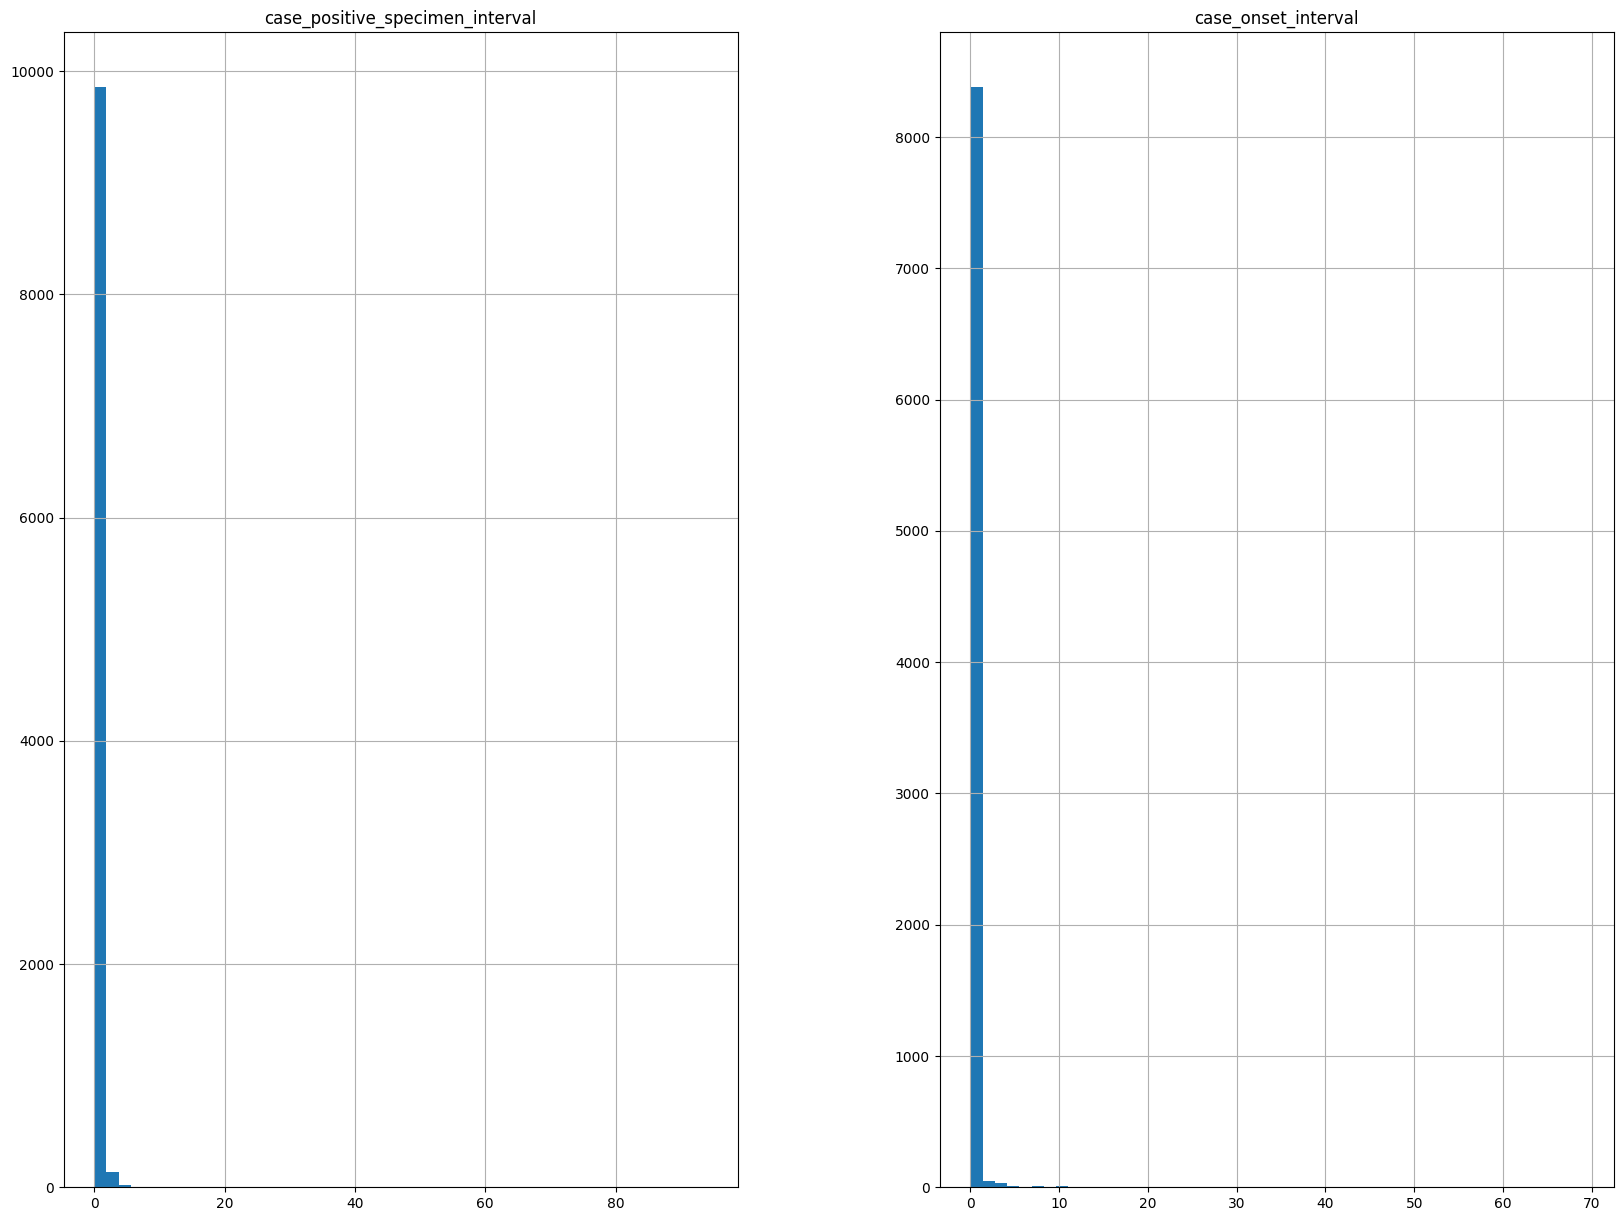

<Figure size 640x480 with 0 Axes>

In [51]:
# Plot histograms for all the continuous features
continuous_features.hist(bins=50, figsize=(20,15))

# Show the plot
plt.show()
# We can save this into a file as shown below.
plt.savefig('Continuous_Histograms.jpg')

Plot box plots for all the continuous features.

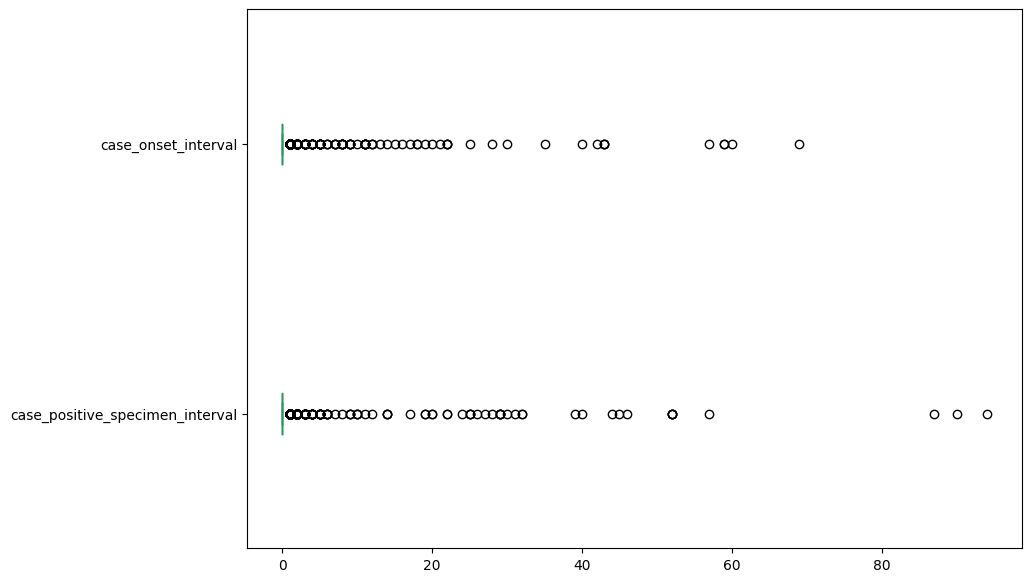

In [52]:
import matplotlib.pyplot as plt

# Select the columns with continuous features
continuous_features = df[['case_positive_specimen_interval', 'case_onset_interval']]

# Plot box plots for the selected continuous features
continuous_features.plot(kind='box', figsize=(10,7), vert=False)

# Show the plot
plt.show()


Plot bar plots for all the categorical features.

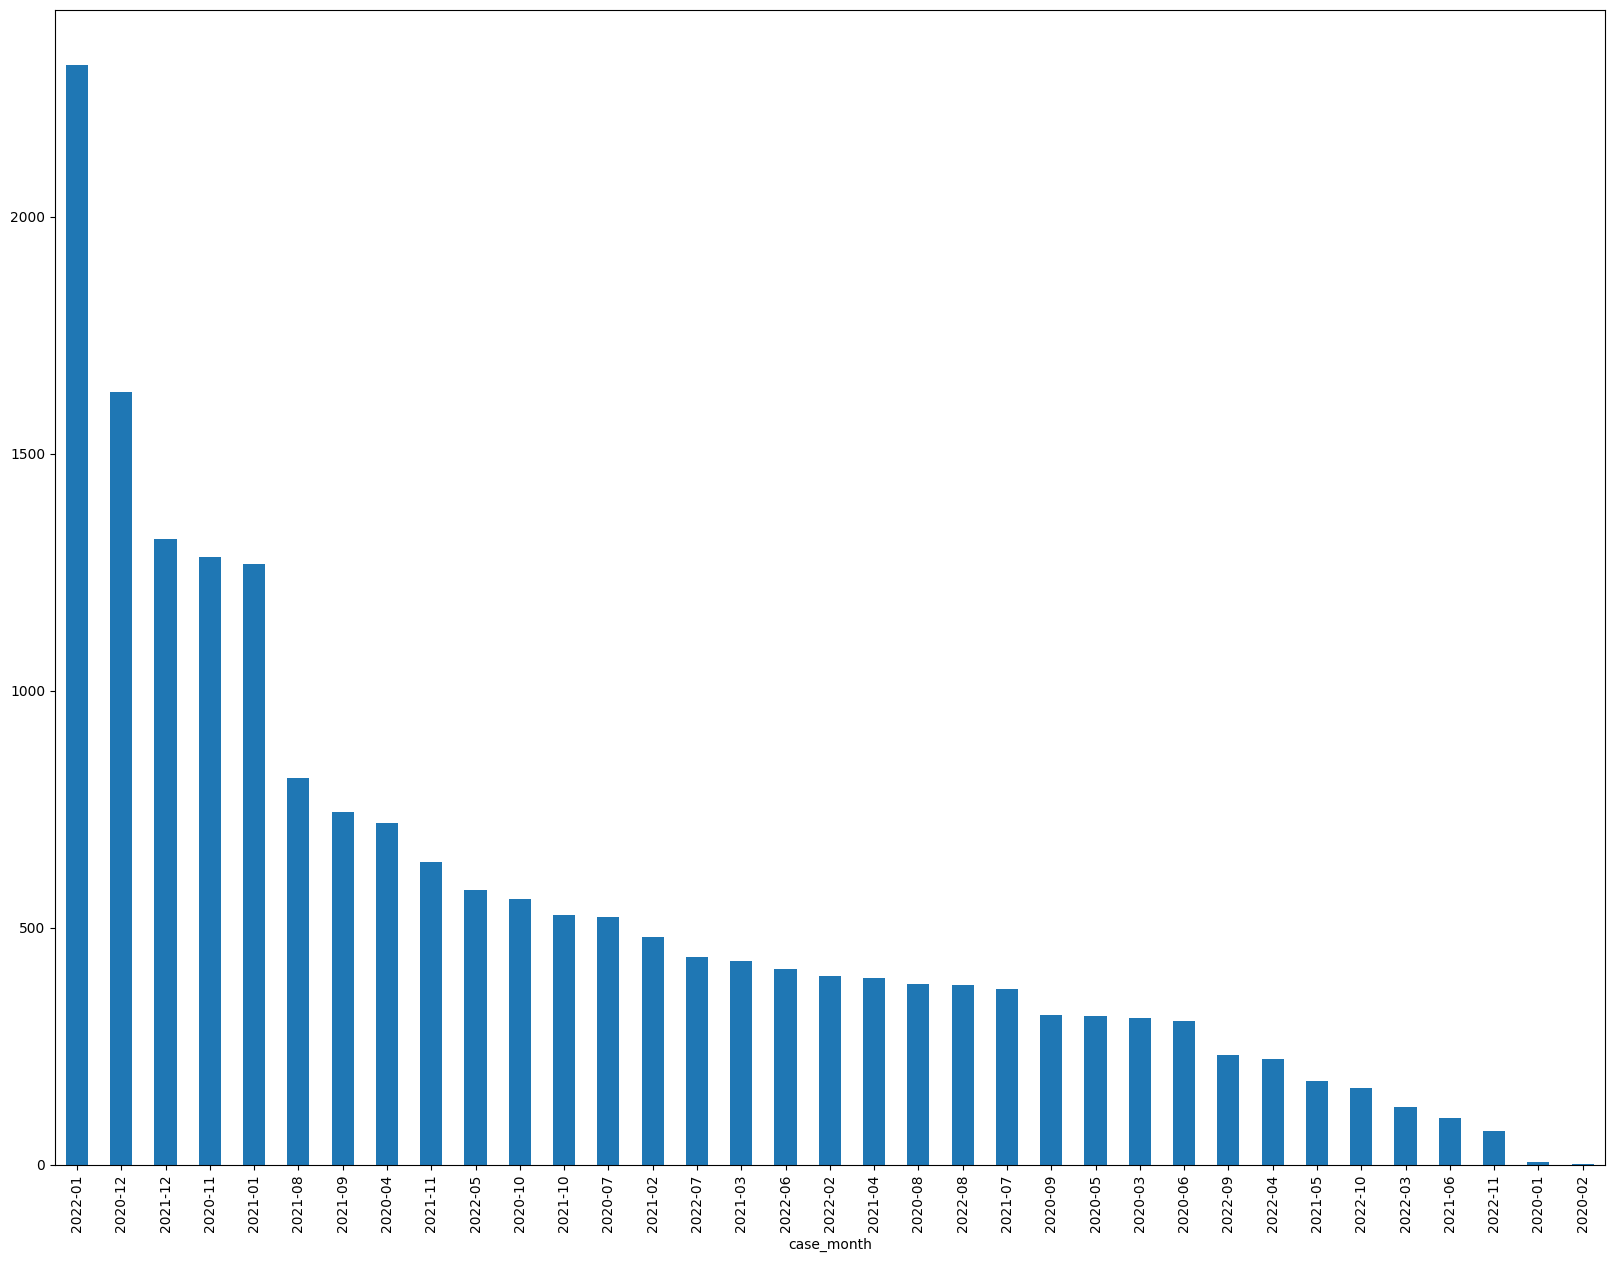

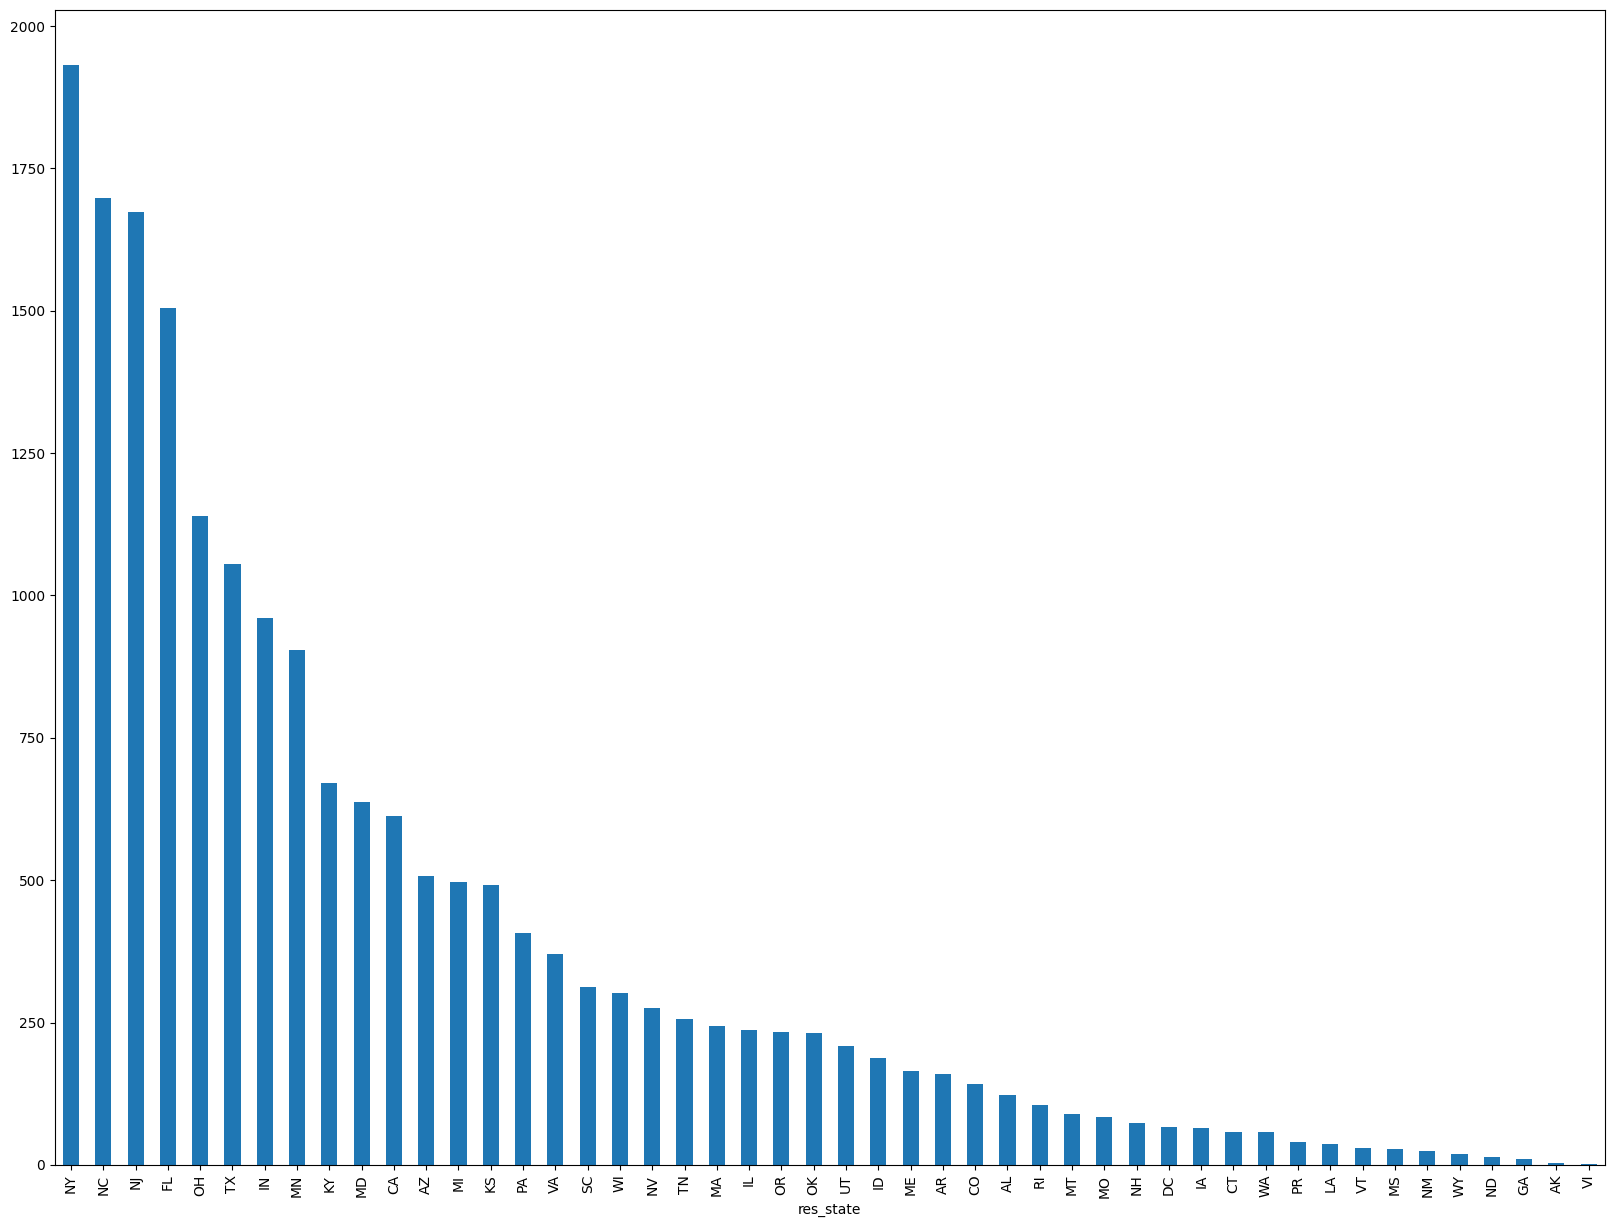

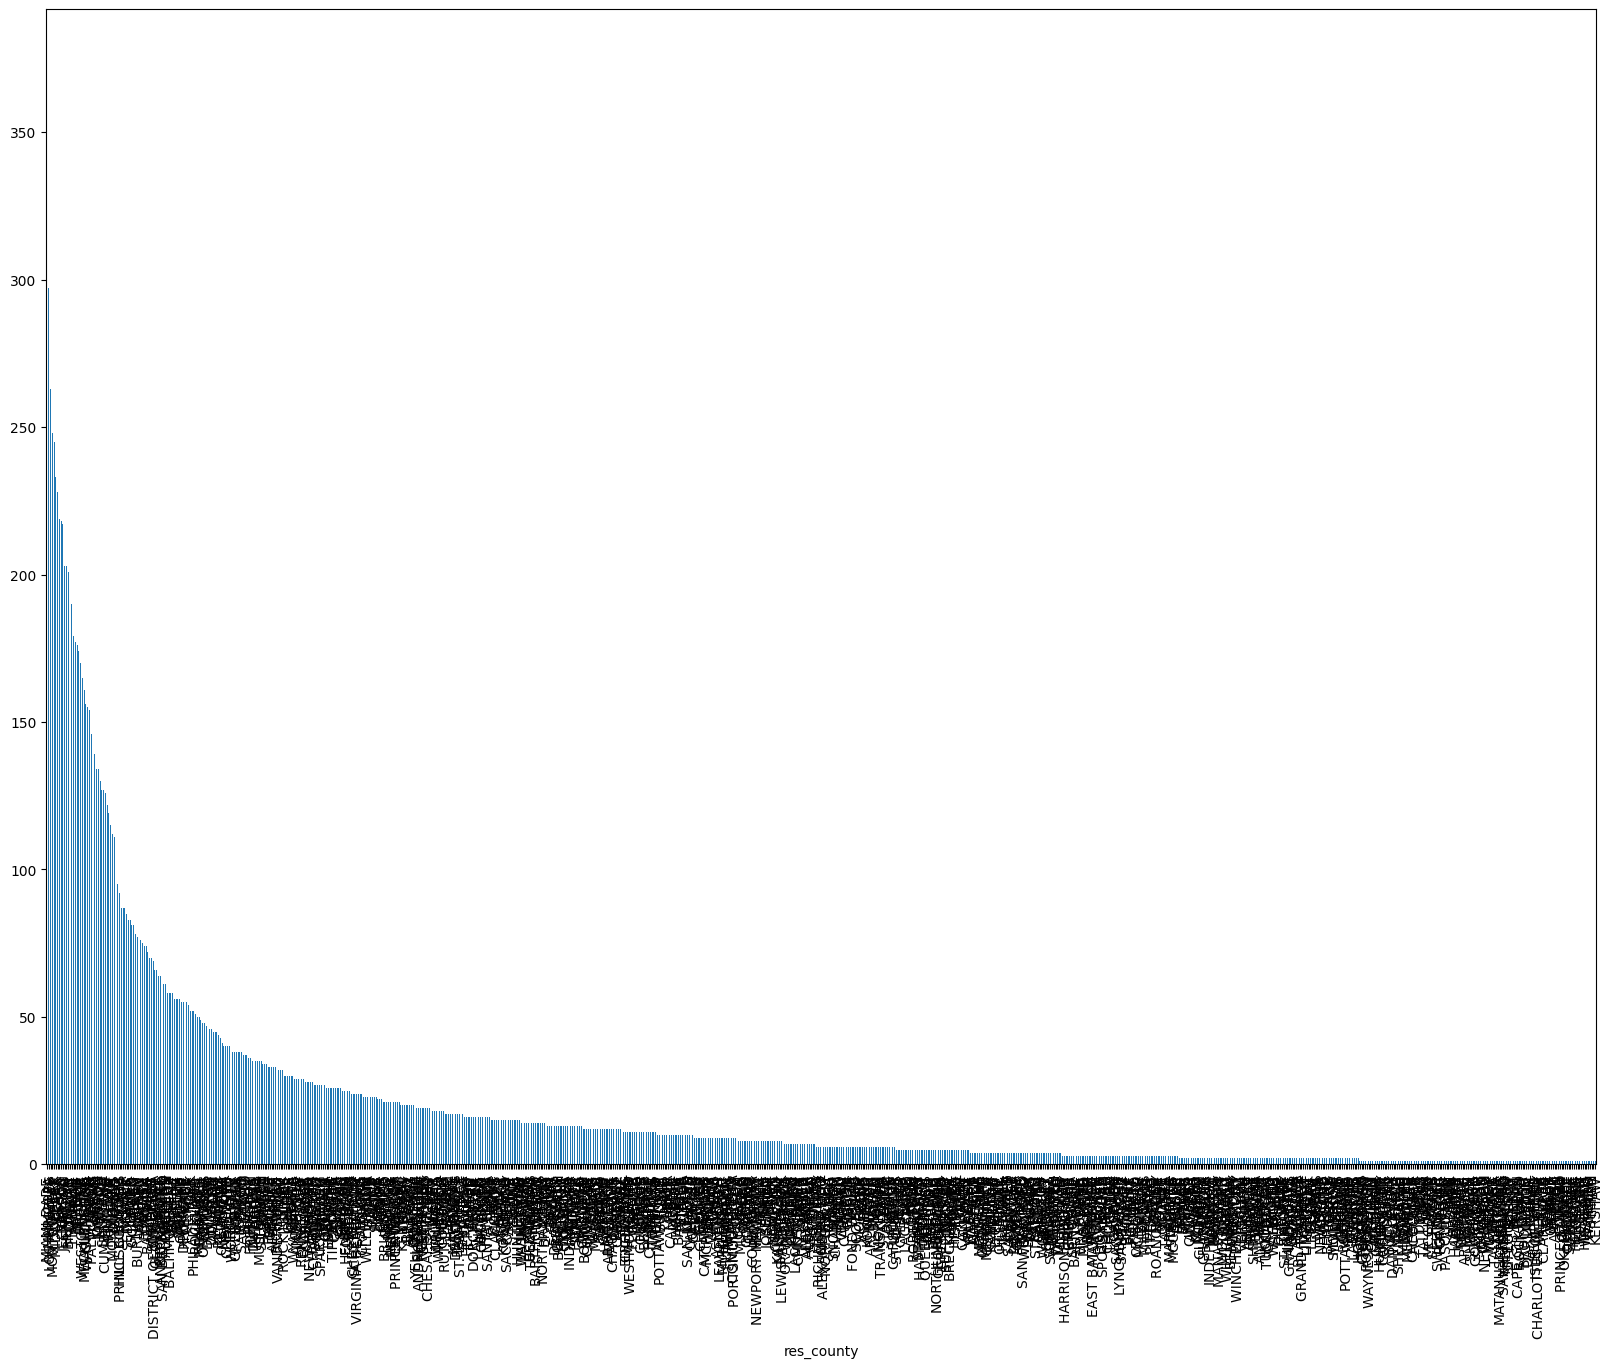

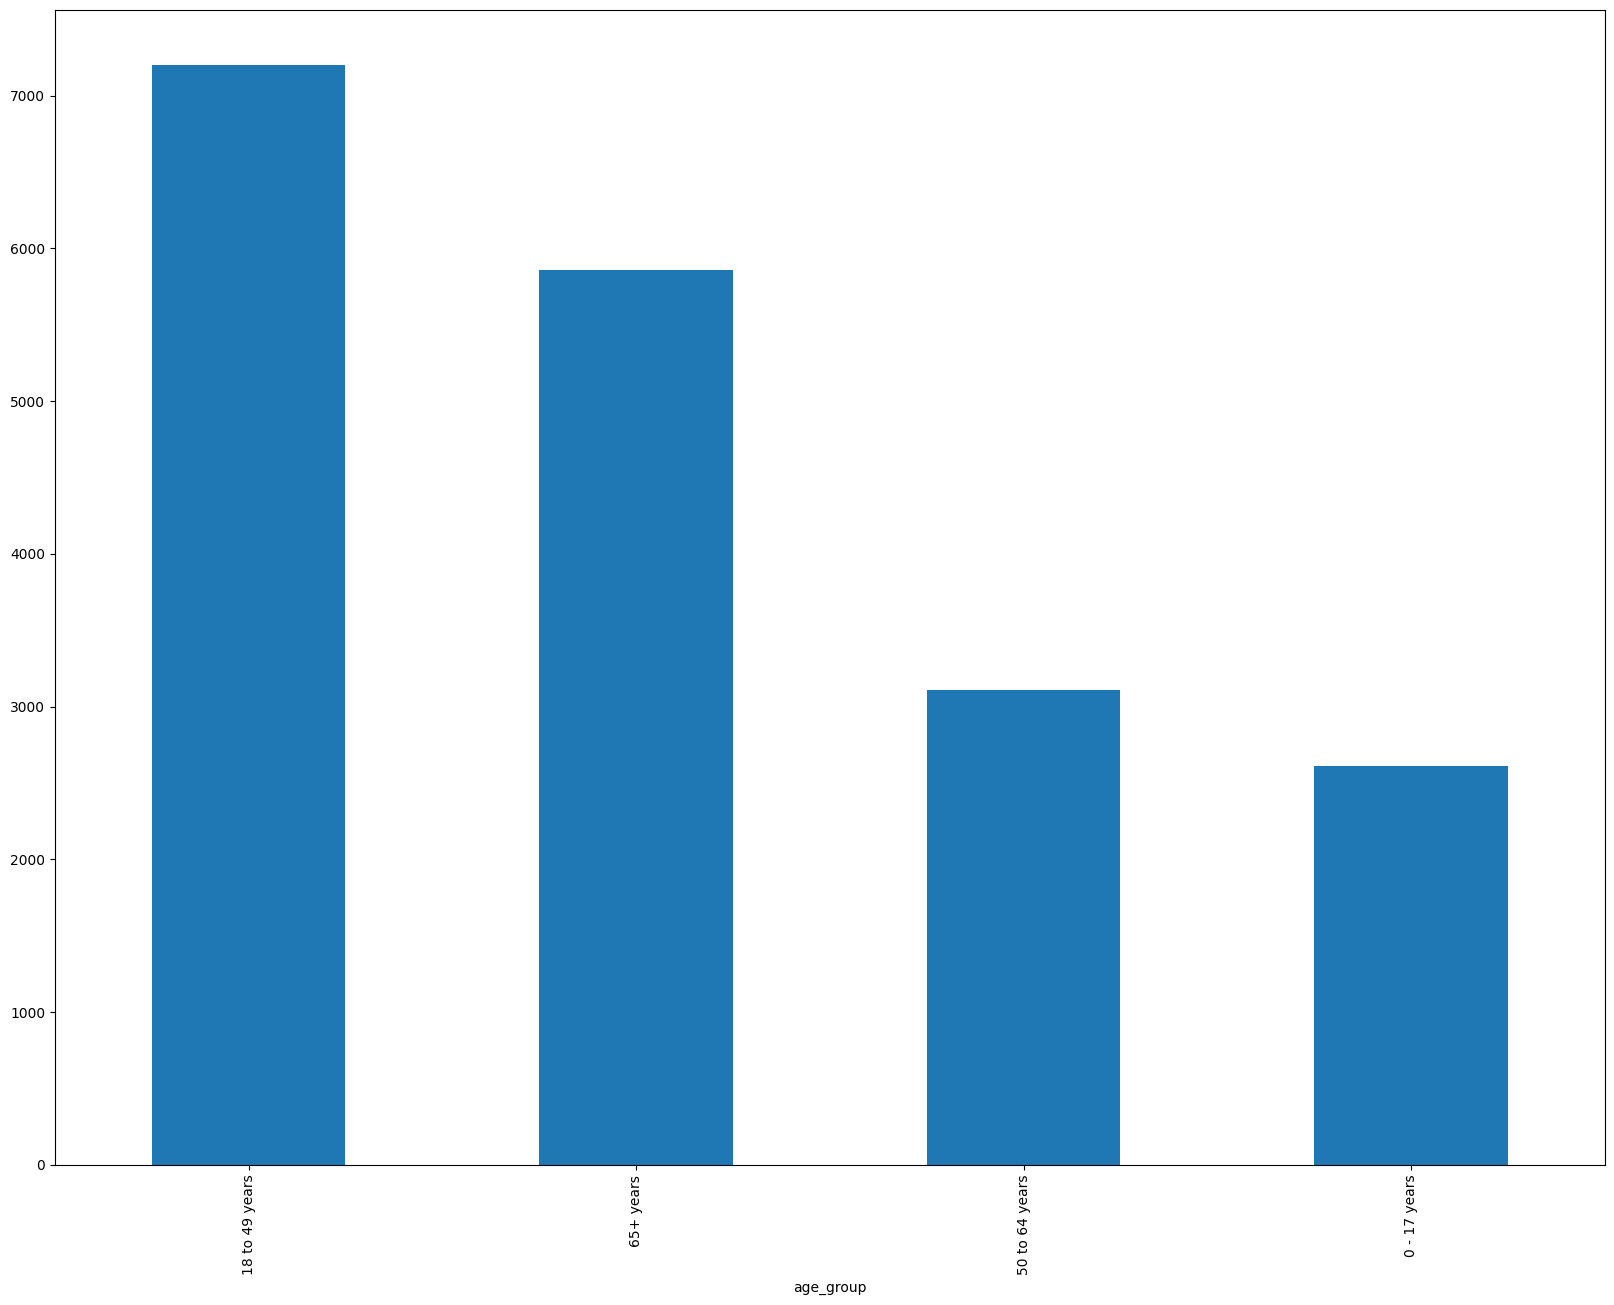

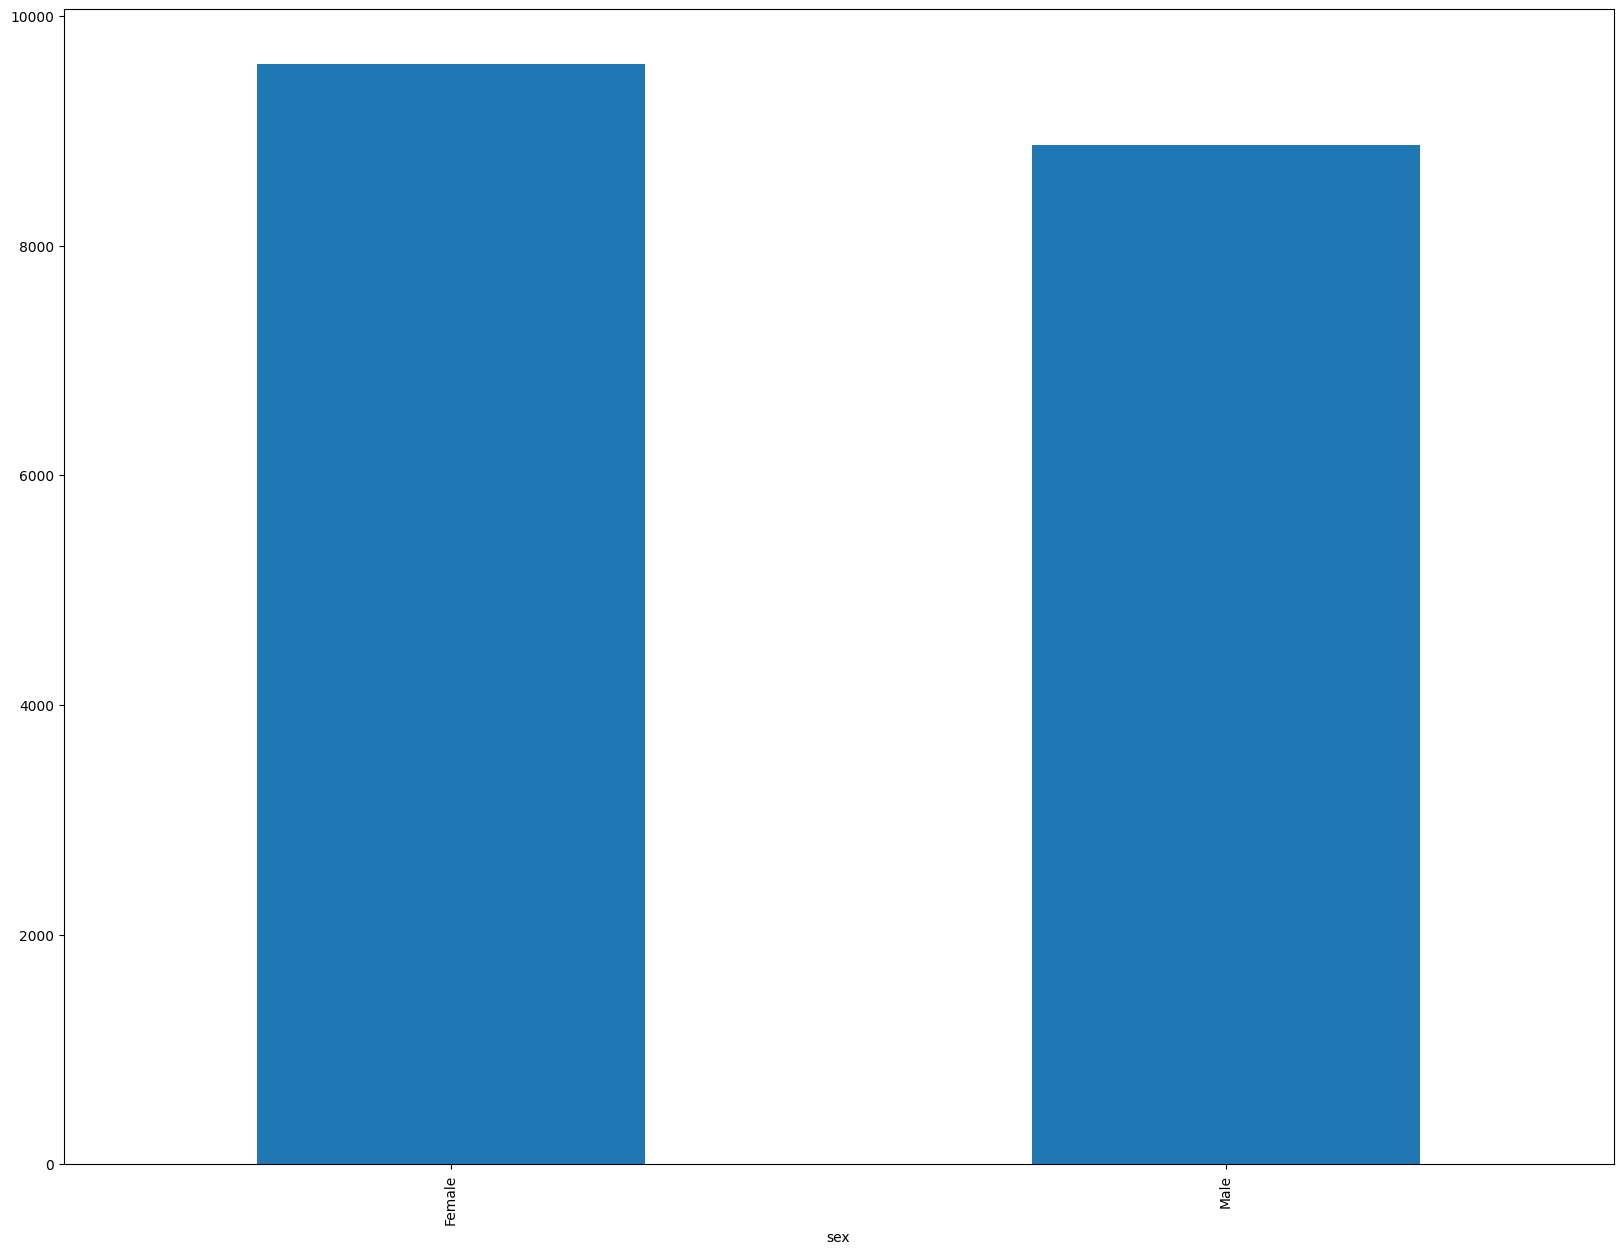

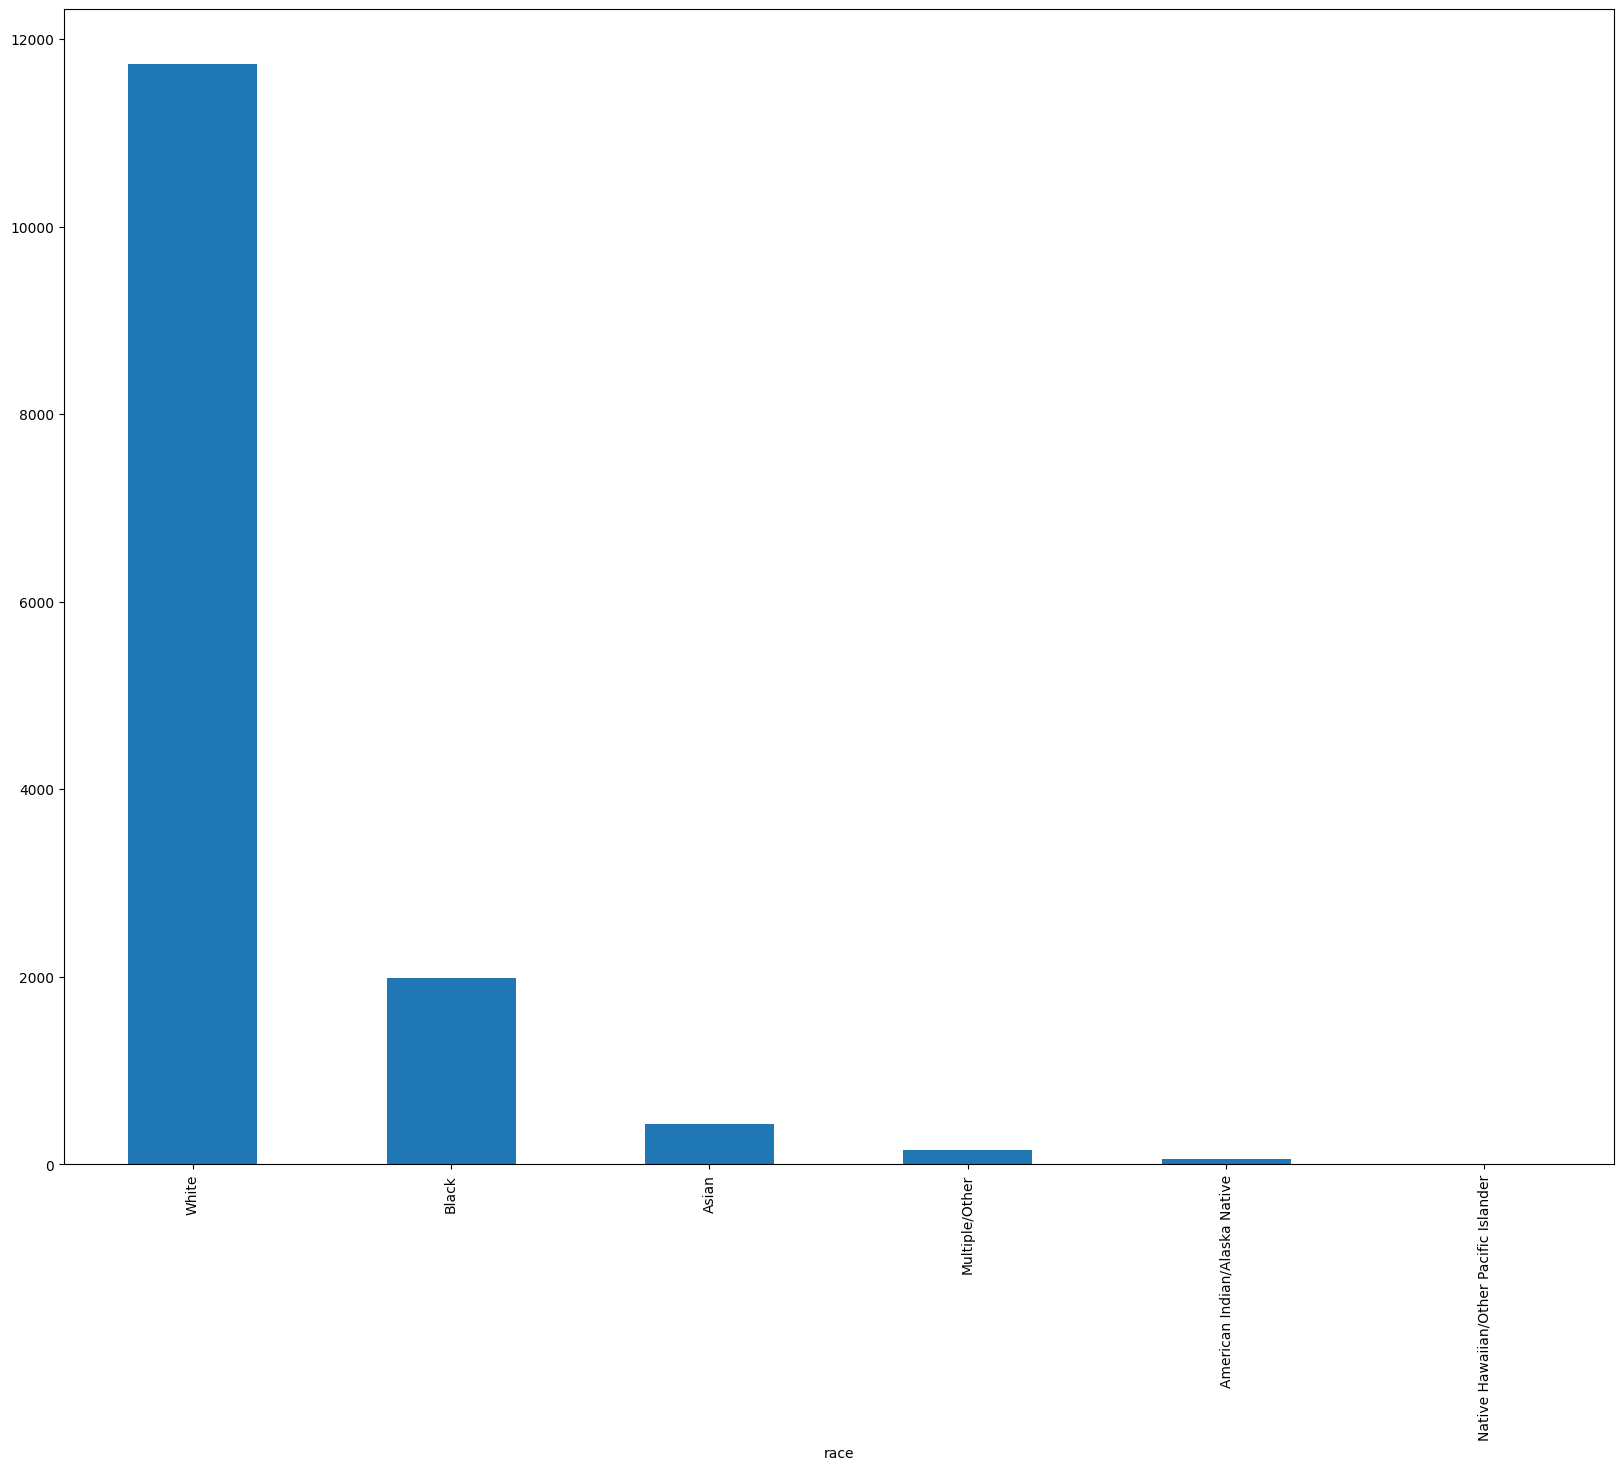

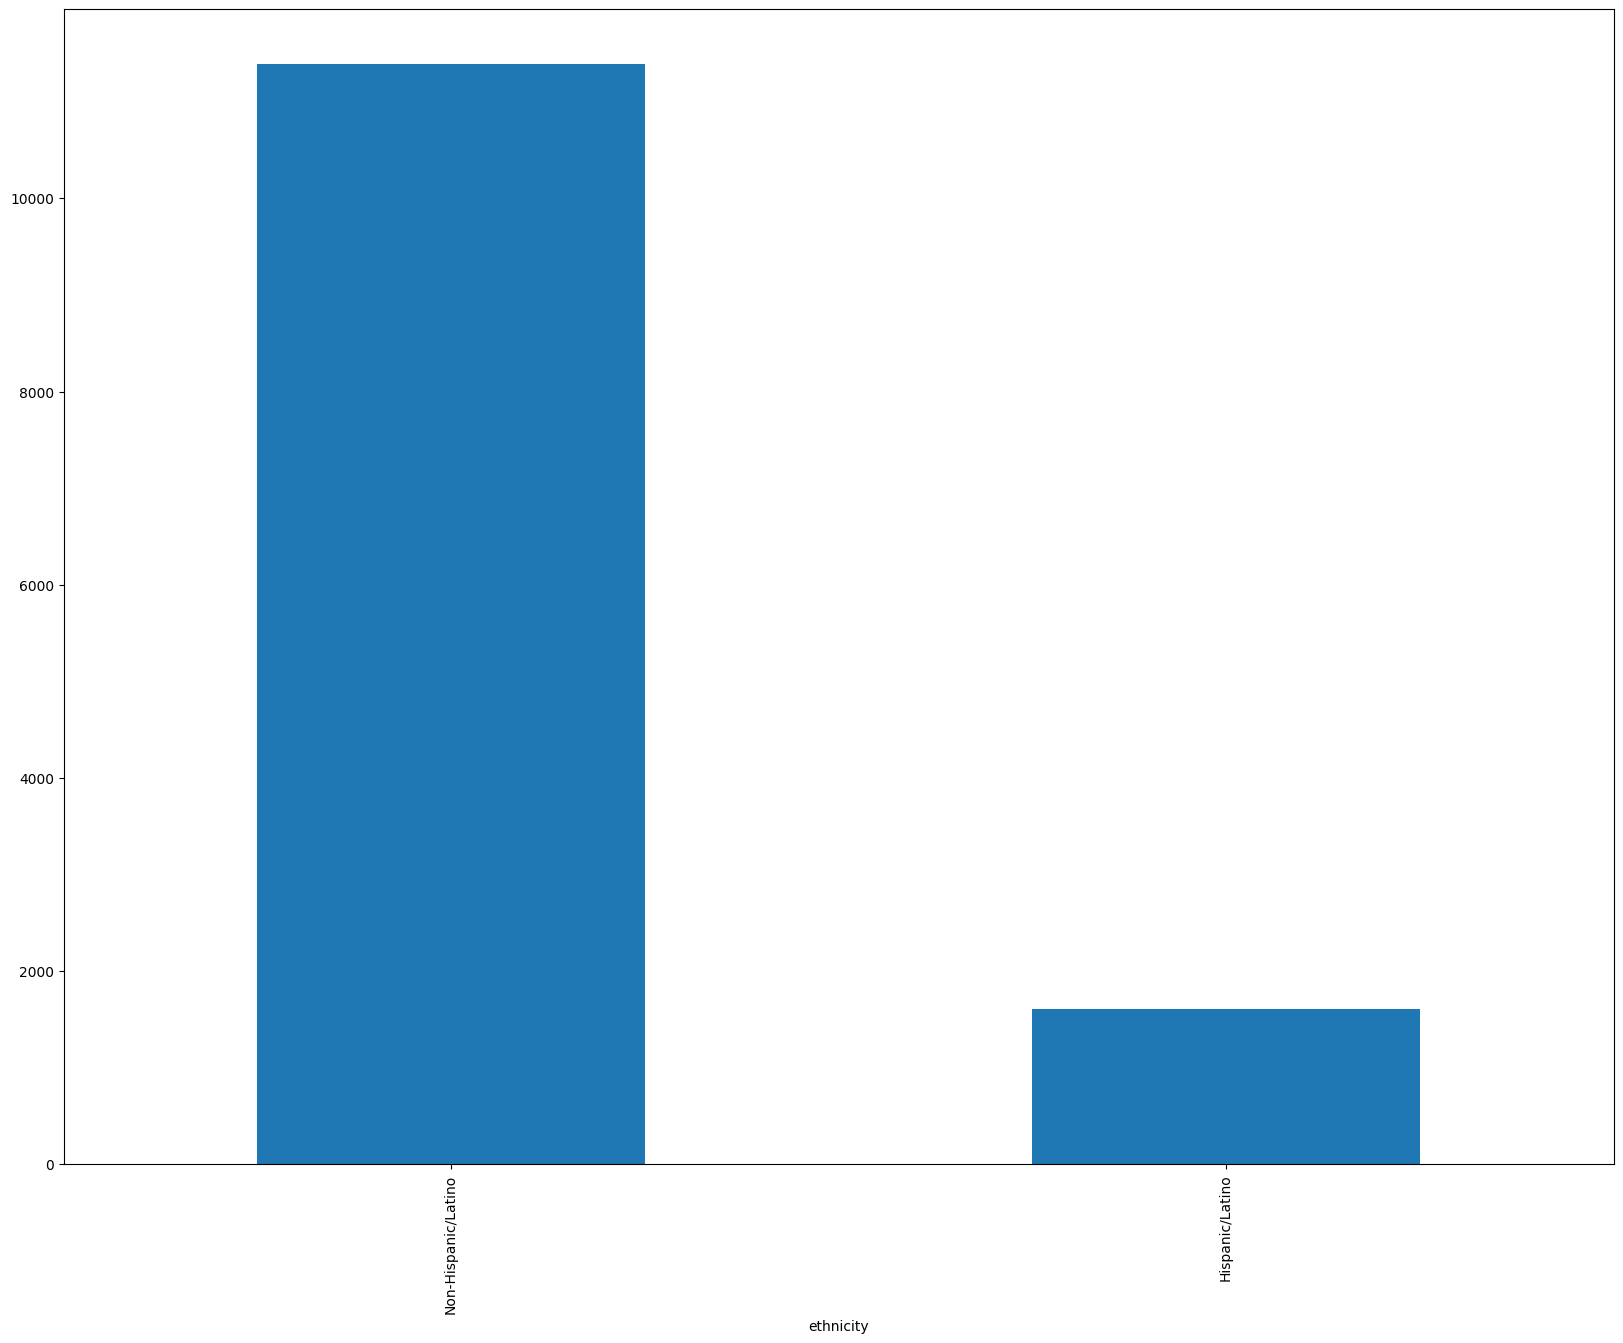

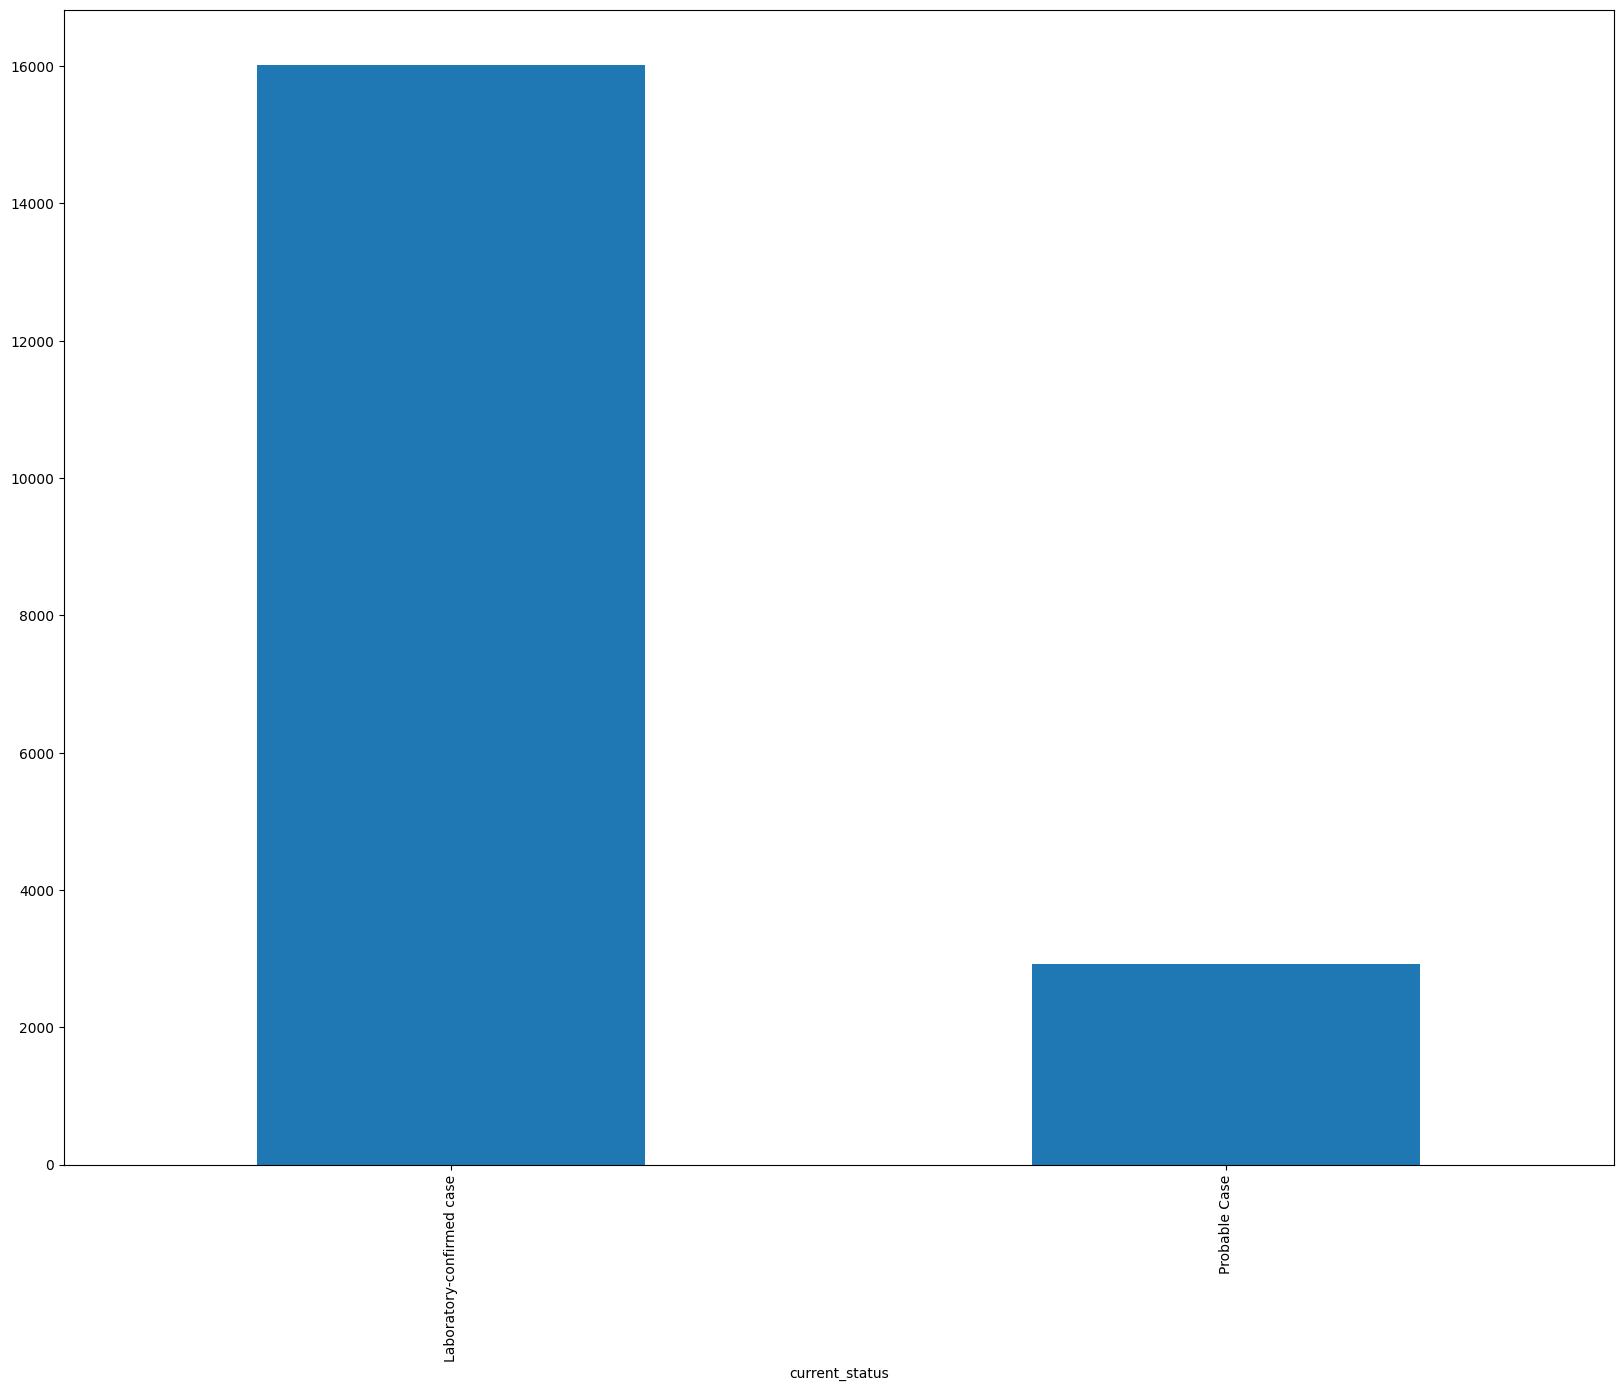

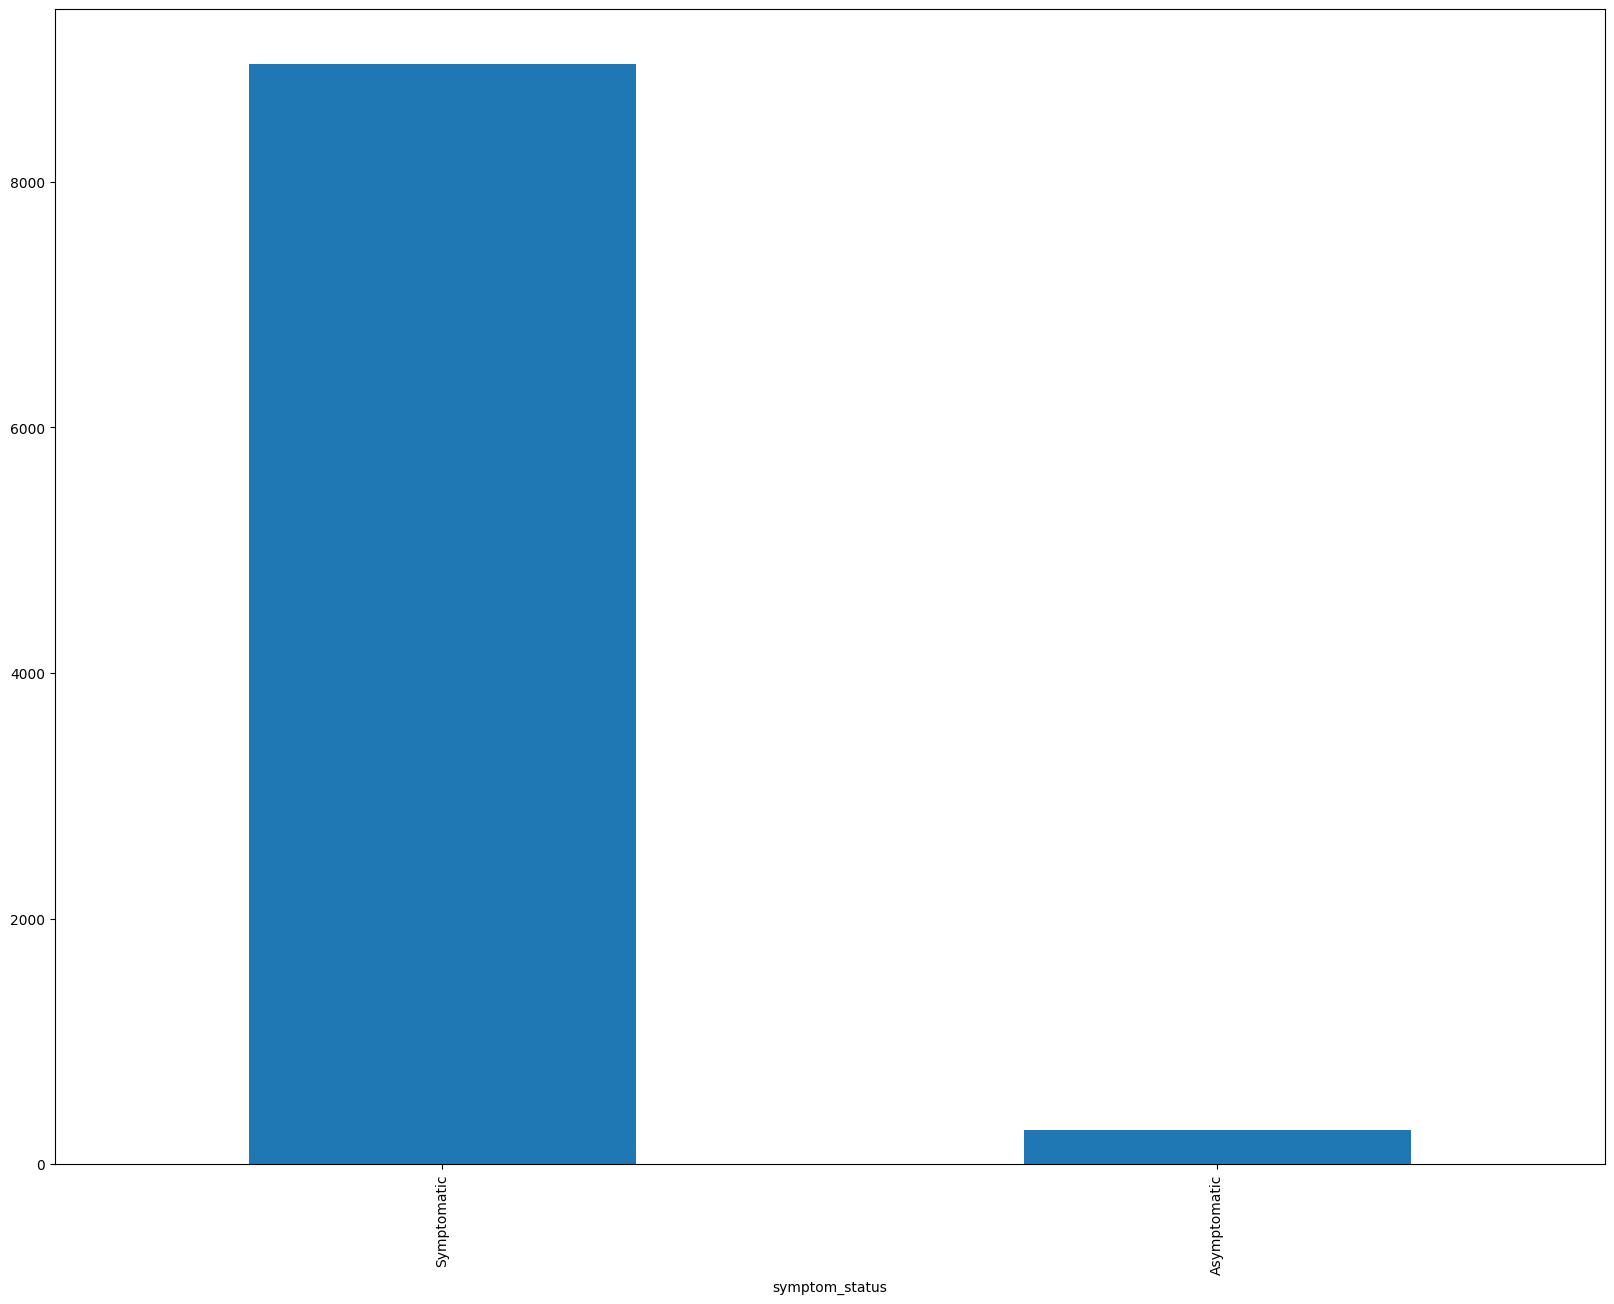

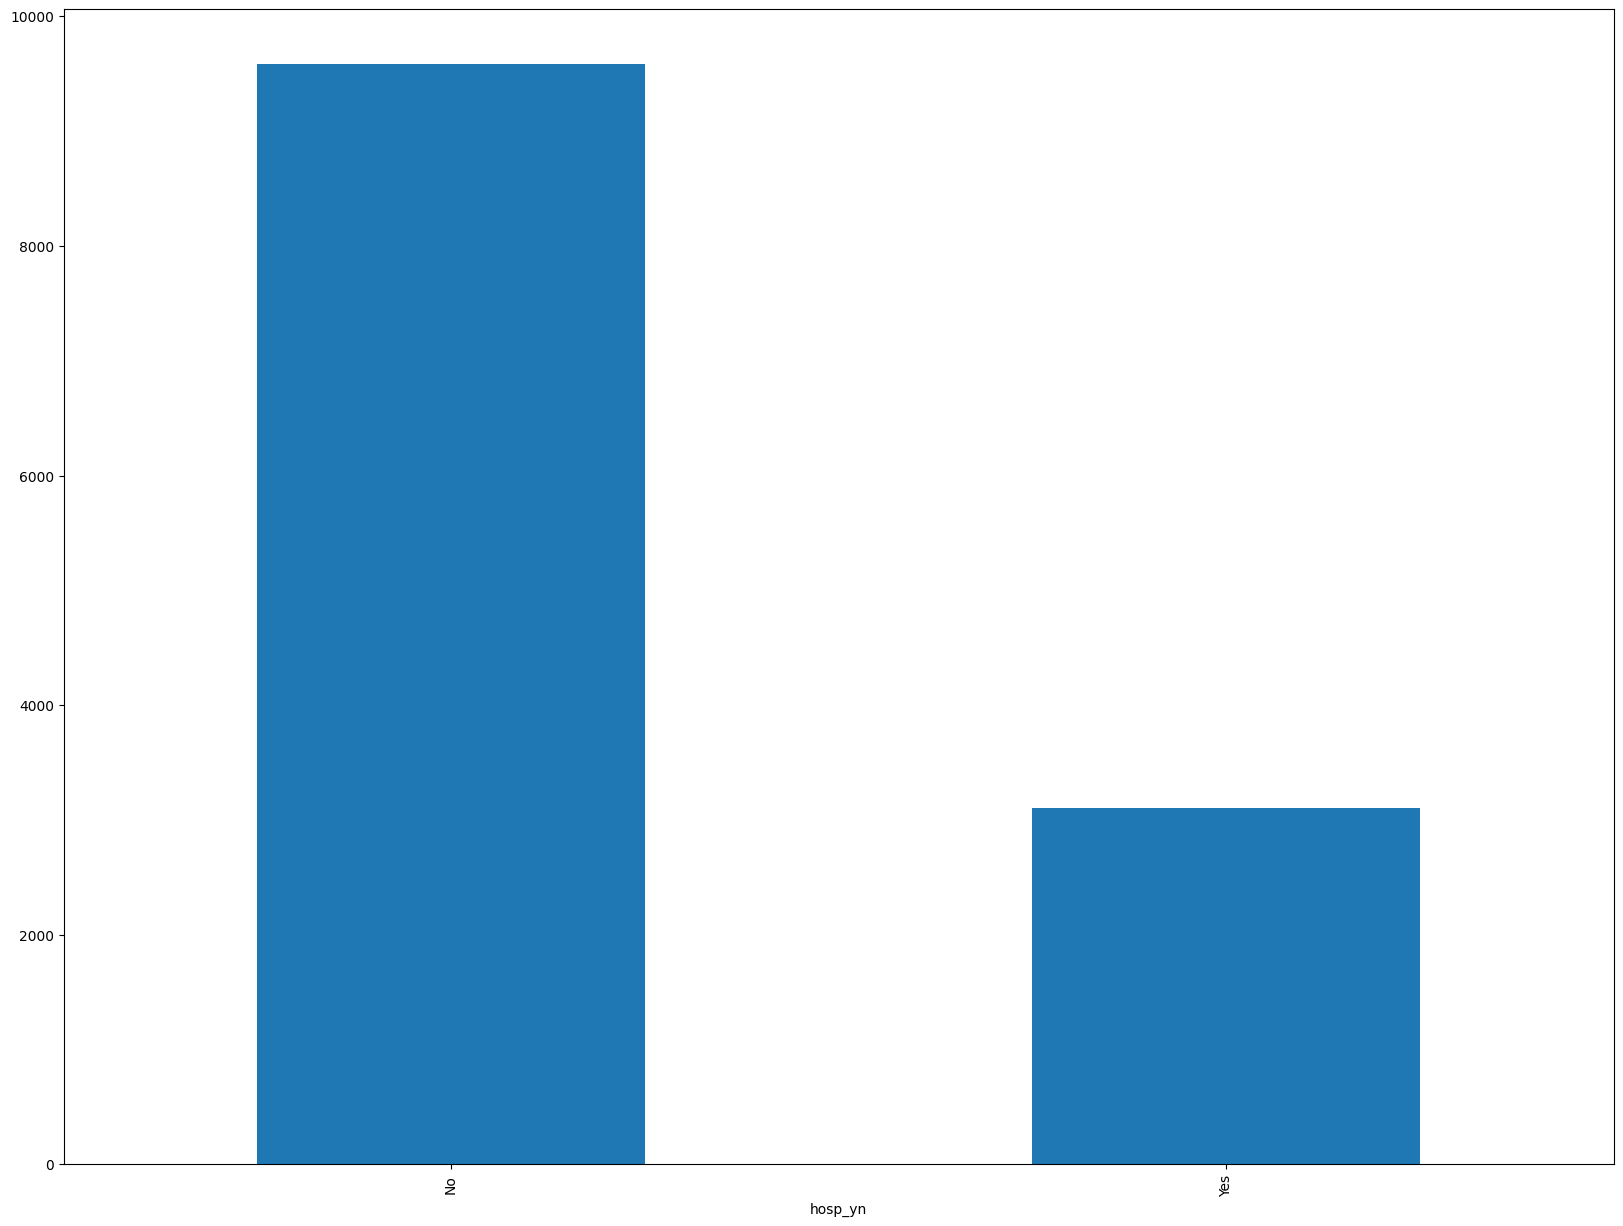

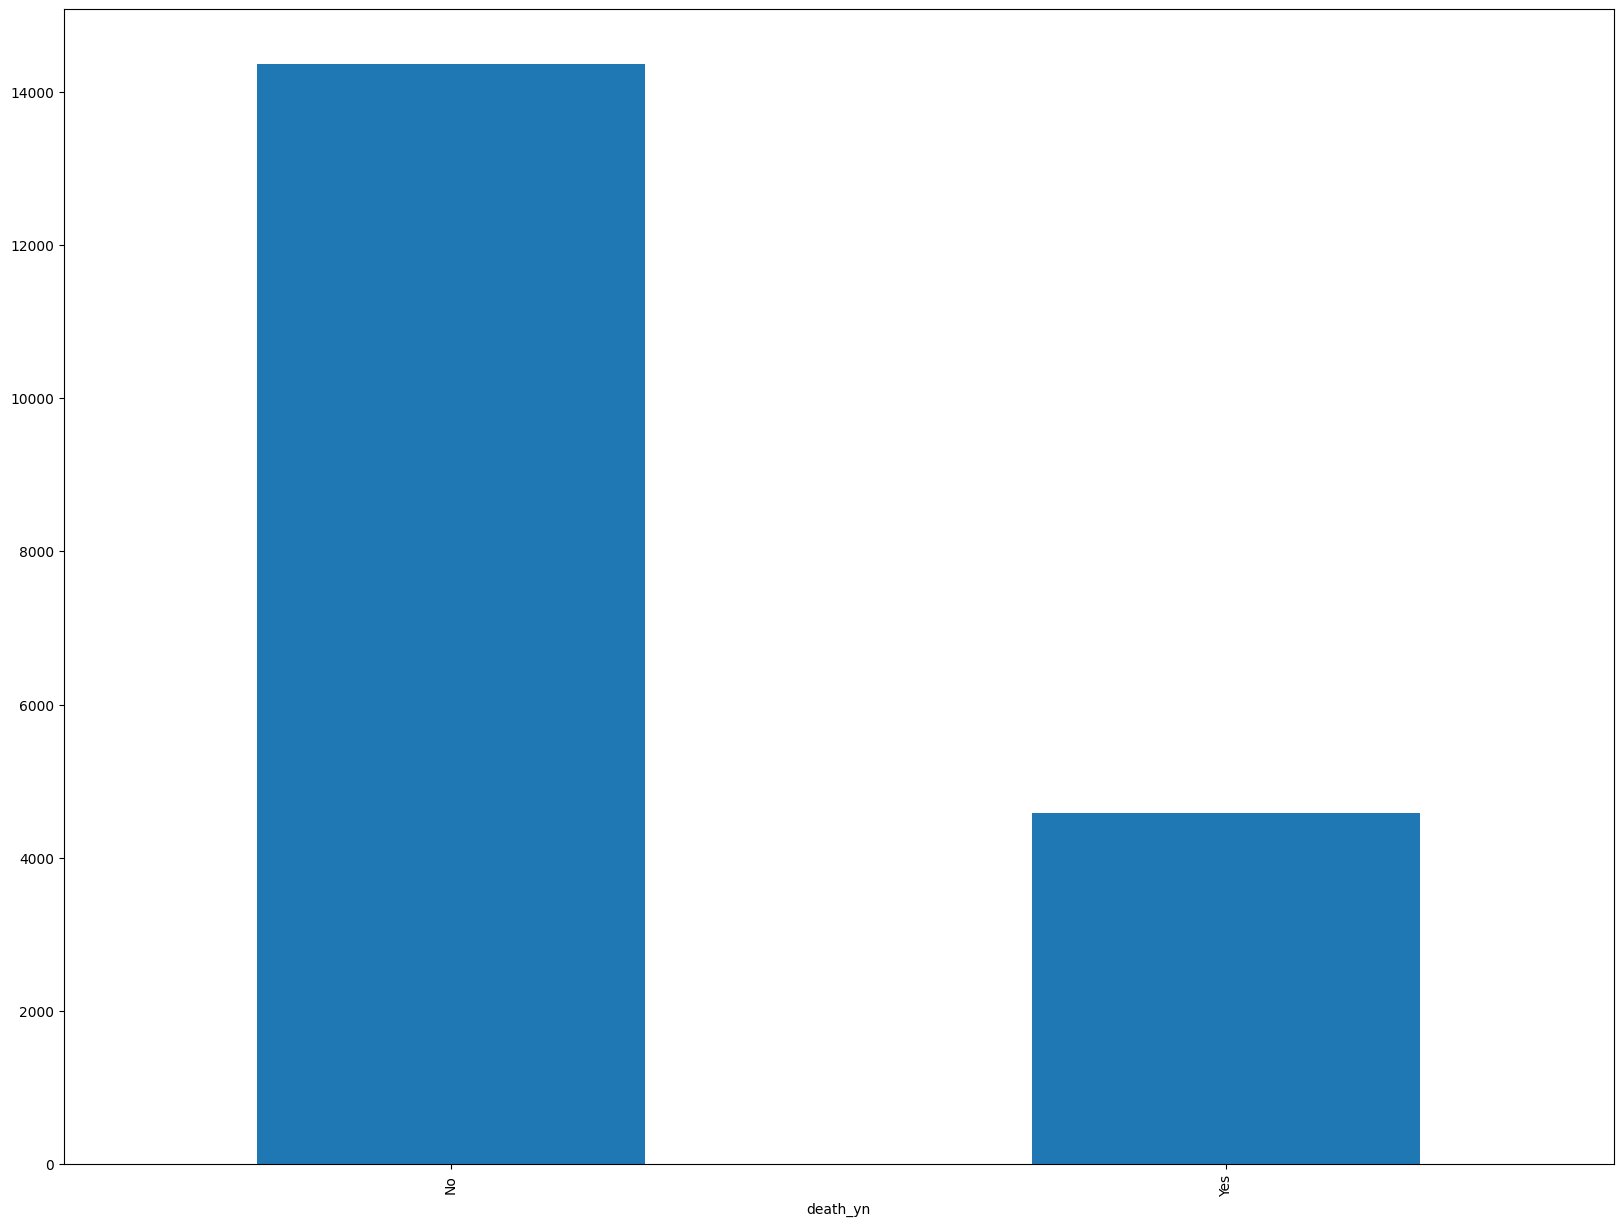

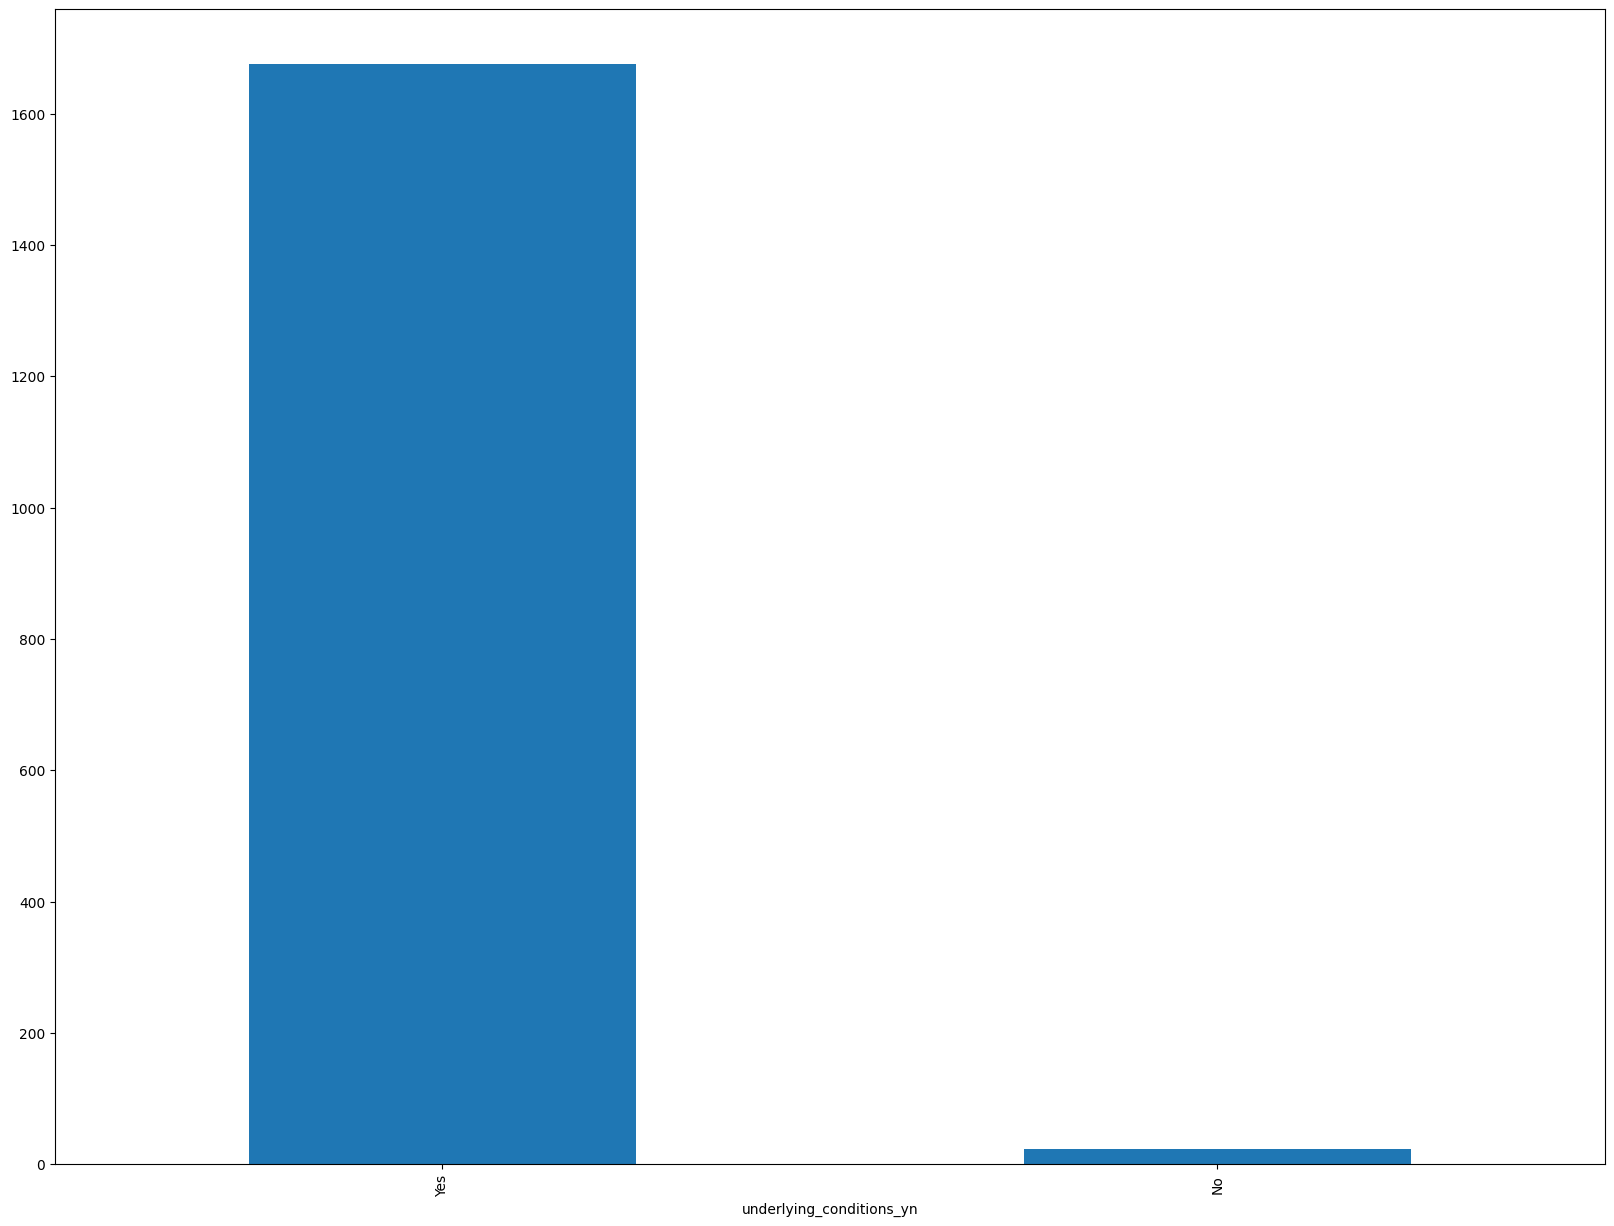

<Figure size 640x480 with 0 Axes>

In [53]:
# Plot bar plots for all the categorical features
for feature in categorical_features:
    df[feature].value_counts().plot(kind='bar', figsize=(20,15))
    plt.xlabel(feature)
    plt.show()

# Save the figure to a file
plt.savefig('Categorical_barPlots.png')


In [54]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_mode, df_category_perc_missing], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
case_month,18945,35,2022-01,2320,2022-01,2320,0.12246,2020-12,1629,0.085986,0.000000
res_state,18944,48,NY,1932,NY,1932,0.101985,NC,1698,0.089633,0.005278
res_county,17820,876,MIAMI-DADE,373,MIAMI-DADE,373,0.020932,MARICOPA,297,0.016667,5.938242
age_group,18819,5,18 to 49 years,7201,18 to 49 years,7201,0.382645,65+ years,5862,0.311494,0.828715
sex,18545,4,Female,9577,Female,9577,0.51642,Male,8879,0.478781,2.581156
race,16681,8,White,11730,White,11730,0.703195,Black,1988,0.119178,24.133017
ethnicity,16461,4,Non-Hispanic/Latino,11387,Non-Hispanic/Latino,11387,0.691756,Unknown,2515,0.152785,31.417260
process,18945,9,Missing,17234,Missing,17234,0.909686,Clinical evaluation,813,0.042914,91.295856
exposure_yn,18945,3,Missing,16276,Missing,16276,0.859119,Yes,1897,0.100132,89.986804
current_status,18945,2,Laboratory-confirmed case,16023,Laboratory-confirmed case,16023,0.845764,Probable Case,2922,0.154236,0.000000


In [55]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,10070.0,0.277160,2.548944,0.0,0.0,0.0,0.0,94.0
case_onset_interval,8524.0,0.186649,2.131543,0.0,0.0,0.0,0.0,69.0


In [56]:
# Save the cleaned DataFrame to a new .csv file
df.to_csv('no_data_quality_issues.csv', index=False)

Save the initial discussion of your findings into a single data quality report PDF file. 

<h1>Data Quality Plan </h1>

### | Feature                                  | Data Quality Issue                                              | Handling Strategy |
|-------------------------       |----------------------                        |----------------- |
Case_month (category)            |No issue                                      |Do Nothing        |
Res_state (category)             |No issue                                      |Do Nothing        |  
Res_county (category)            |No issue                                      |Do Nothing        |
Age_group (category)             |No issue                                      |Do Nothing        | 
Sex (category)                   |No issue                                      |Do Nothing        |   
Race (category)                  |Missing Value (11.95%)                        |Do Nothing        |
Ethnicity (category)             |Missing Value (13.11%) & 2nd Mode (15.3365%)  |Do Nothing        |
Process (category)               |Missing Value (91.345%)                       |Drop              |
Exposure_yn (category)           |Missing Value (86.48%)                        |Drop              |    
Current_status (category)        |No issue                                      |Do Nothing        |   
Symptom_status (category)        |2nd Mode Missing(41.21%)                      |Keep as its an interesting stat     |
Hosp_yn (category)               |2nd Mode Missing(21.68%)                      |Do Nothing        |
ICU_yn (category)                |Missing Value (91.507%)                       |Drop              |
Dead_yn (category)               |No issue                                      |Do Nothing        |
Underlyin_condition_yn(category) | Missing Values (91.285%)                     |Keep as its an interesting stat  |
Case_positive_interval(float)    |Duplicate of res_state                        |Removed           |
Case_onset_interval  (float)     |Duplicate of res_county                       |Removed           |
Case_positive_interval(float)    | Significant outliers & Negative values|Replace negative value with absolute value & left outliers stay the same |
Case_onset_interval(float        |Significant outliers & Negative values|Replace negative value with absolute value & left outliers stay the same |


<h1>Initial Findings

Initial findings and detailed discussion for each feature can be found in the accompanying Data_Quality_Report_Initial_Findings.pdf file

(2). Data Understanding: Data Quality Plan for the cleaned CSV file.</h1>




### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

In [57]:
# Save the cleaned DataFrame to a new .csv file
df.to_csv('no_data_quality_issues.csv', index=False)

3). [15] Exploring relationships between feature pairs:

- Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
Explain your choices.
- Discuss your findings from the plots above. Do you find any features or feature combinations that are 
indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
findings so far.


For this task, I would choose the following subset of features:

age_group (categorical)
sex (categorical)
race (categorical)
dead_yn(categorical)
res_state (categorical)
underlying_conditions_yn (categorical)
case_onset_interval (continuous)
case_positive_interval (continuous) 
symptom_status(category)

Categorical-Categorical Feature Interaction: To explore the relationship between categorical features, I created stacked bar charts to show the distribution of each categorical variable within the levels of the other categorical variable.

The fact that a large number of those who died had an underlying condition suggests that having an underlying condition may increase the risk of death from COVID-19. However, it is important to note that there are also a significant number of missing values for underlying condition, which may limit the validity of this conclusion. It is possible that some of the people who are missing data on underlying conditions also had underlying conditions that increased their risk of death. Therefore, it is important to interpret the results with caution and consider the limitations of the data.

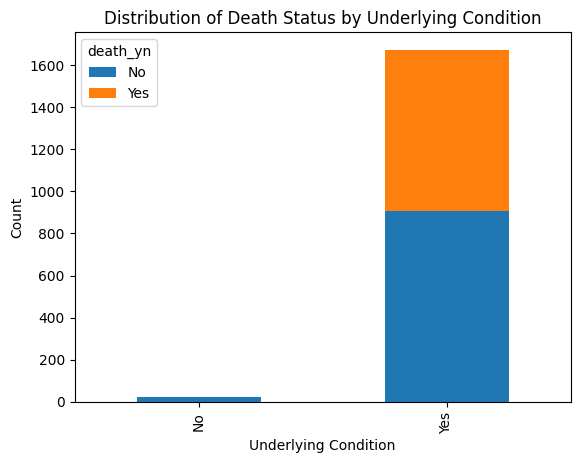

In [58]:
subset = df[['death_yn', 'underlying_conditions_yn']]

# group the data by death status and underlying condition and count the number of occurrences
grouped = subset.groupby(['death_yn', 'underlying_conditions_yn']).size().reset_index(name='count')

# pivot the data to create a stacked bar chart
pivoted = grouped.pivot(index='underlying_conditions_yn', columns='death_yn', values='count')

# create the stacked bar chart
pivoted.plot(kind='bar', stacked=True)
plt.xlabel('Underlying Condition')
plt.ylabel('Count')
plt.title('Distribution of Death Status by Underlying Condition')
plt.show()

I created stacked bar charts showing the distribution of dead status within each sex category, and vice versa. Examining the distribution of death status within each sex category can help us understand if there are any gender disparities in COVID-19 mortality rates. This information could be useful for developing targeted public health interventions and policies to reduce the overall impact of the pandemic.

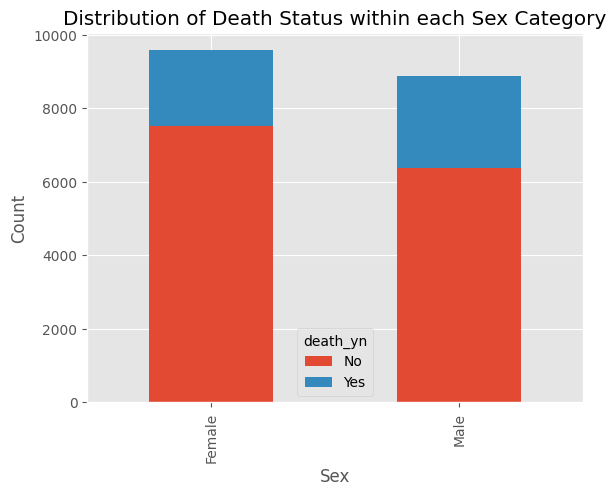

In [59]:
subset_df = df[['sex', 'death_yn']]

# Group the data by sex and death status and count the occurrences
grouped_df = subset_df.groupby(['sex', 'death_yn']).size().reset_index(name='counts')

# Create a pivot table for the stacked bar chart
pivot_df = grouped_df.pivot(index='sex', columns='death_yn', values='counts')

# Set the plot style and plot the stacked bar chart
plt.style.use('ggplot')
pivot_df.plot(kind='bar', stacked=True)
plt.title('Distribution of Death Status within each Sex Category')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Comparing the death status across different racial groups can provide important insights into the impact of COVID-19 on different communities. Racial disparities have been observed in COVID-19 outcomes, with some studies showing that Black and Hispanic individuals are at higher risk of infection and death compared to white individuals.

By examining the distribution of death status across different racial groups, we can identify any significant disparities in COVID-19 outcomes and develop targeted interventions to reduce such disparities.

The below chart indicates that most of our data are white while the second most is black and third is asian. There seems to be a similar % of deaths across the three races. 

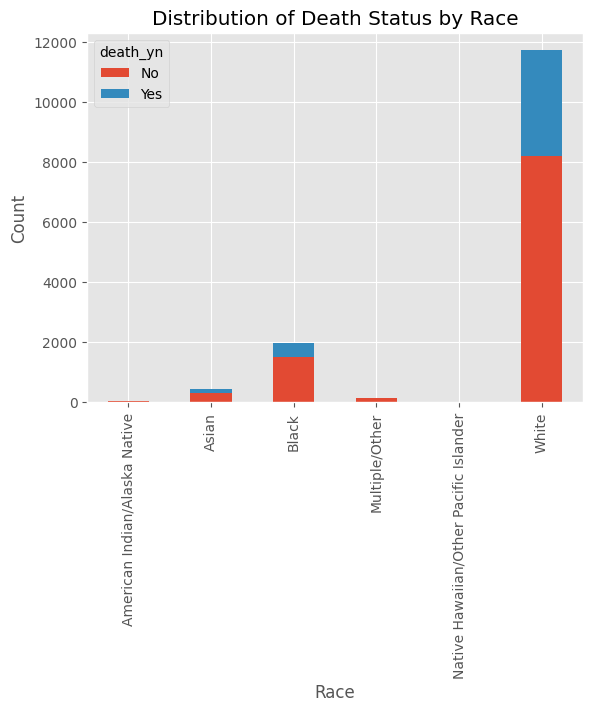

In [60]:
subset = df[['death_yn', 'race']]

# group the data by death status and race and count the number of occurrences
grouped = subset.groupby(['death_yn', 'race']).size().reset_index(name='count')

# pivot the data to create a stacked bar chart
pivoted = grouped.pivot(index='race', columns='death_yn', values='count')

# create the stacked bar chart
pivoted.plot(kind='bar', stacked=True)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Death Status by Race')
plt.show()


<h4>For continuous-continuous feature interactions, I use a scatter plot to show the relationship between the two variables. For example, I create a scatter plot showing the relationship between case onset interval and case positive interval. </h4>
<br>This scatter plot is shaped like an L. 
    This indicates a potential linear relationship between two variables up to a certain point, followed by a plateau or no relationship beyond that point. The horizontal part of the L shape indicates that the value of one variable does not have a significant effect on the value of the other variable. However, as the value of the variable on the x-axis increases, the value of the variable on the y-axis increases up to a certain point, after which there is no further increase in the value of the y-axis variable. This type of relationship is called a threshold relationship.

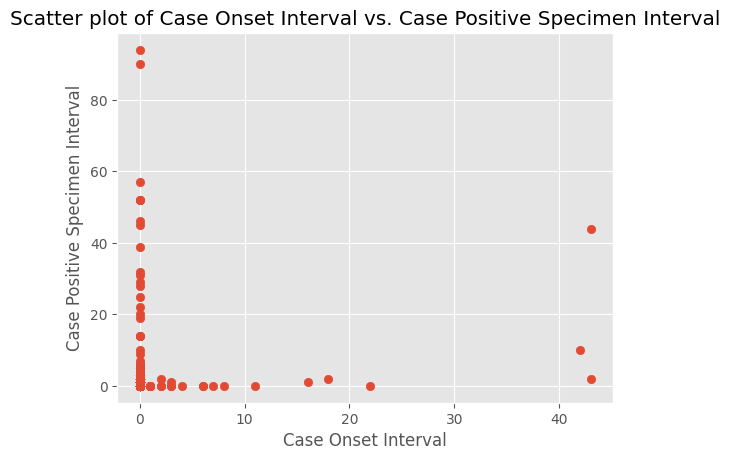

In [61]:
import matplotlib.pyplot as plt

# create scatter plot
plt.scatter(df['case_onset_interval'], df['case_positive_specimen_interval'])
plt.xlabel('Case Onset Interval')
plt.ylabel('Case Positive Specimen Interval')
plt.title('Scatter plot of Case Onset Interval vs. Case Positive Specimen Interval')
plt.show()


<h4>For categorical-categorical feature interactions, I use a stacked bar chart to show the distribution of each categorical variable within the levels of the other categorical variable. I create stacked bar charts showing the distribution of age groups within each sex category, and vice versa.</h4>

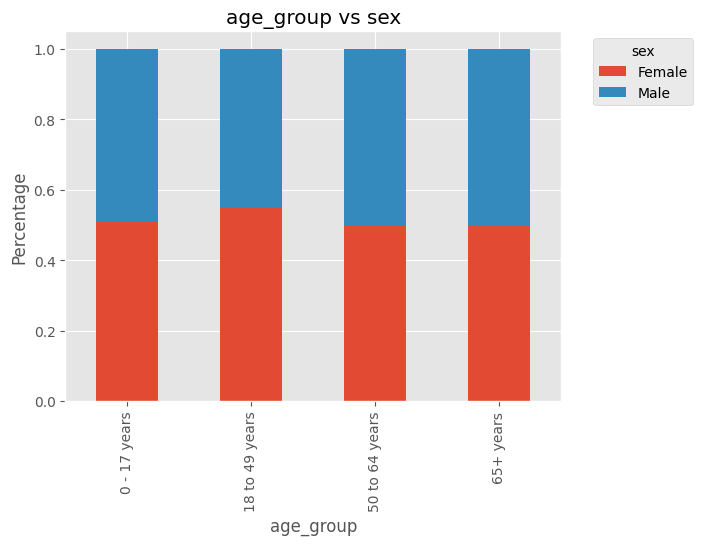

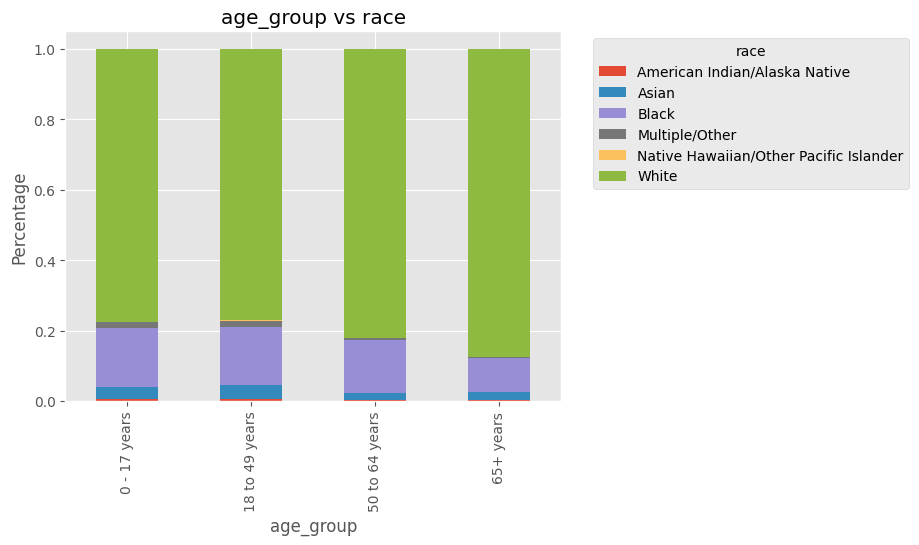

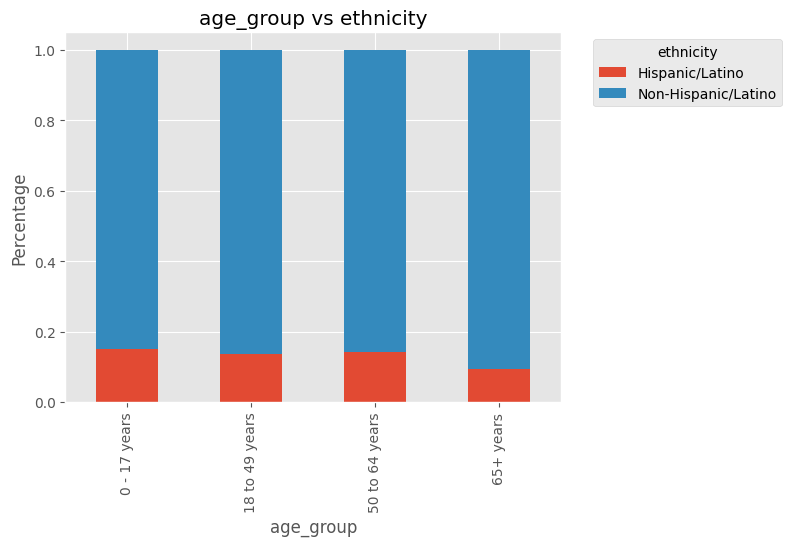

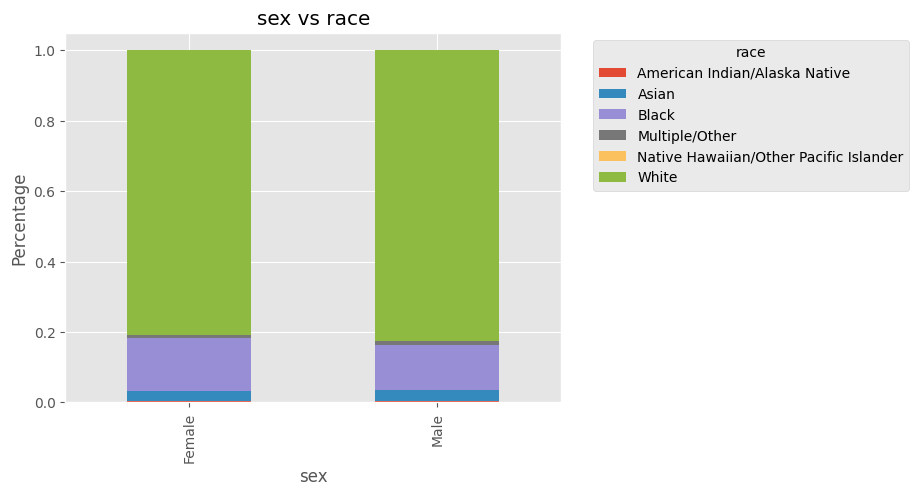

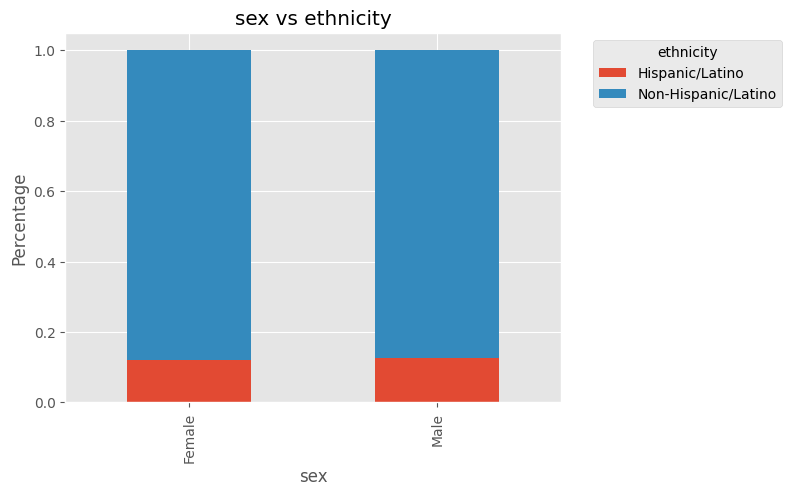

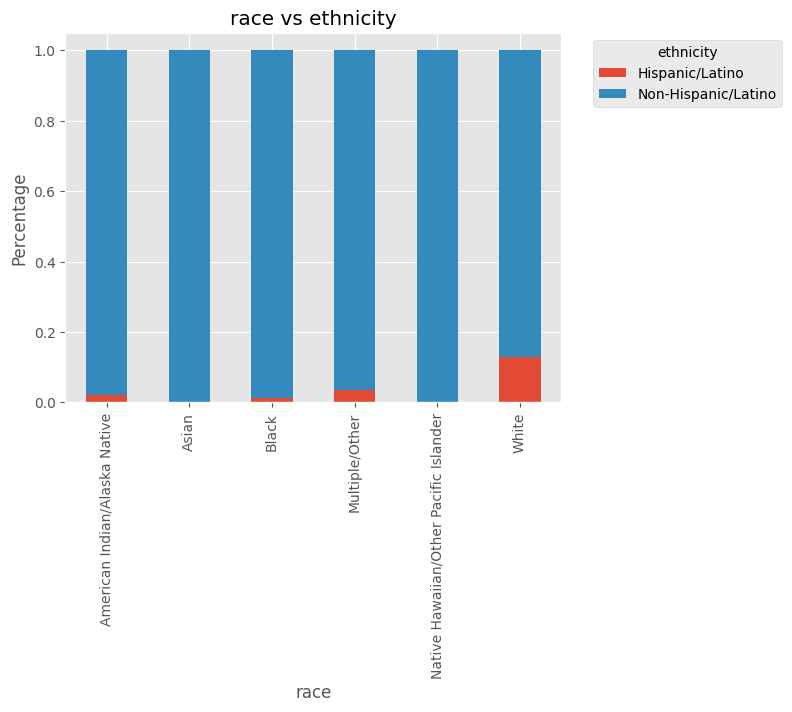

In [62]:
# Define the categorical variables to plot
categorical_features = ['age_group', 'sex', 'race', 'ethnicity']

# Loop through each pair of categorical variables and create a stacked bar chart
for i in range(len(categorical_features)):
    for j in range(i+1, len(categorical_features)):
        # Create a cross-tabulation of the two categorical variables
        ct = pd.crosstab(df[categorical_features[i]], df[categorical_features[j]])
        
        # Normalize the counts to show percentages
        ct = ct.apply(lambda r: r/r.sum(), axis=1)
        
        # Create a stacked bar chart of the cross-tabulation
        ct.plot(kind='bar', stacked=True)
        plt.title(f'{categorical_features[i]} vs {categorical_features[j]}')
        plt.xlabel(categorical_features[i])
        plt.ylabel('Percentage')
        plt.legend(title=categorical_features[j], bbox_to_anchor=(1.05, 1))
        plt.show()


<h4>For continuous-categorical feature interactions, I would use a violin plot or box plot to show the distribution of the continuous variable within each level of the categorical variable. For example, I would create violin plots showing the distribution of case onset interval within each level of sex, and vice versa.</h4>

Exploring the distribution of case onset interval by sex through a violin plot can provide insights into potential differences in disease progression between males and females. In this case, the wider and less tall shape of the male distribution suggests a larger spread of case onset intervals among males, with some cases occurring earlier and others occurring much later. The narrower but taller female distribution indicates a smaller spread of case onset intervals among females, with most cases occurring within a narrower range. The fact that the string (or line) on the female plot goes higher than on the male plot indicates that there are more extreme values (either high or low) for case onset interval among females compared to males.

This information can be useful for understanding potential differences in disease progression between males and females, as well as for identifying potential risk factors that may be more prevalent in one gender or the other. For example, if males tend to have a wider spread of case onset intervals, it may suggest that certain behaviors or underlying health conditions are more prevalent in males that contribute to more severe cases of COVID-19.

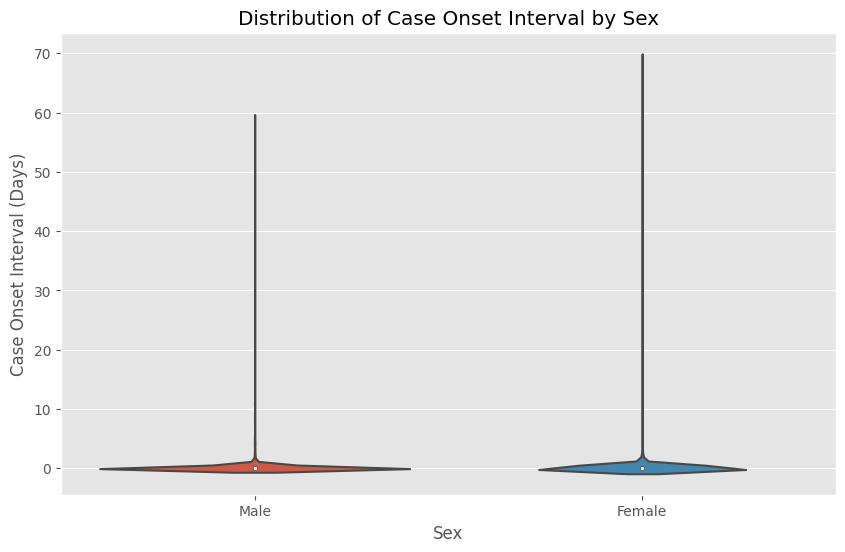

In [63]:

import seaborn as sns
# violin plot of case onset interval by sex
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='case_onset_interval', data=df)
plt.title('Distribution of Case Onset Interval by Sex')
plt.xlabel('Sex')
plt.ylabel('Case Onset Interval (Days)')
plt.show()



<h4>I use a correlation matrix to examine the correlation between the continuous variables and identify any strong correlations. This can help identify potential relationships between variables and guide further analysis.</h4>

The code is generating a heatmap of the correlation matrix for the continuous variables 'case_onset_interval' and 'case_positive_specimen_interval'. Correlation measures the strength and direction of the linear relationship between two variables. By calculating the correlation between these two variables, we can understand if there is a relationship between the time from symptom onset to specimen collection and the time from specimen collection to the case confirmation.

A positive correlation indicates that as one variable increases, the other variable also tends to increase, while a negative correlation means that as one variable increases, the other variable tends to decrease. A correlation coefficient of 0 indicates that there is no linear relationship between the variables, while a correlation coefficient of 1 or -1 indicates a perfect positive or negative linear relationship, respectively.

In this case, the correlation coefficient is 0.14, which suggests a weak positive correlation between the two variables. This means that there is a small tendency for longer case onset intervals to be associated with longer case positive specimen intervals, and vice versa. We might want to explore this relationship further to see if there are any other factors that might be influencing the correlation.

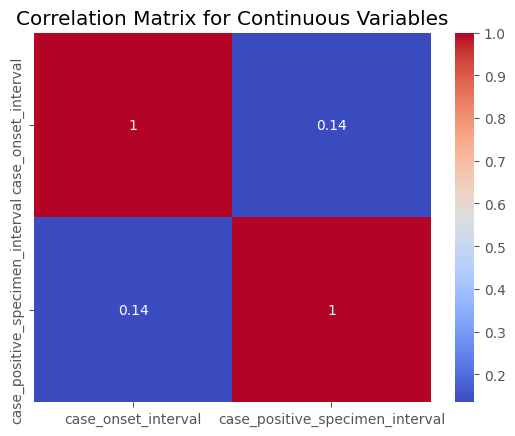

In [64]:
selected_columns = ['case_onset_interval', 'case_positive_specimen_interval']

# create a subset dataframe with the selected columns
subset_df = df[selected_columns]

# calculate the correlation matrix
corr_matrix = subset_df.corr()

# visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title of the plot
plt.title('Correlation Matrix for Continuous Variables')

# display the plot
plt.show()

<h4>(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name.</h4>

Having a separate column for the month can be useful for various reasons. For example, it allows us to perform analyses based on the month alone, without having to parse the month information from the case_month column every time. This can make data manipulation and visualization more efficient. Additionally, having the month separated can help us identify patterns or trends that occur on a monthly basis, which can provide insight into the spread and impact of the disease over time.

In [65]:
# create a new column 'month' which only takes the month part of case_month
df['month'] = pd.to_datetime(df['case_month']).dt.month_name()

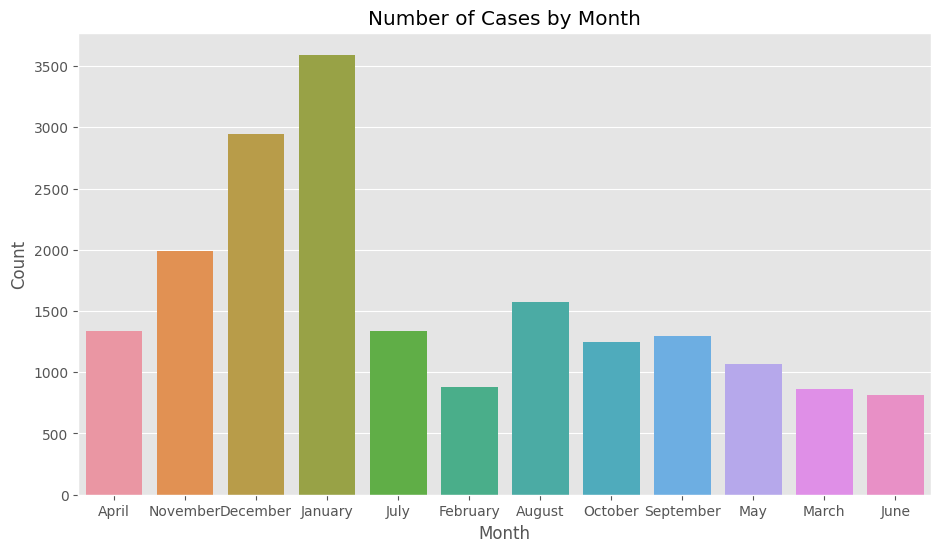

In [66]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.countplot(x='month', data=df, ax=ax)
plt.title('Number of Cases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


We create a new feature called collection_to_onset_interval which represents the number of days between when the case positive specimen was collected and when the case onset occurred. This could give insights into the timing and progression of the disease. The time between when the case positive specimen was collected and when the case onset occurred can indicate how quickly the disease is spreading and potentially how severe the symptoms may be. This information could also be used to better understand the progression of the disease over time and to develop more effective treatments or prevention strategies. Additionally, this feature could be used in predictive models to help forecast the timing and severity of future outbreaks.

In [71]:
# calculate the difference between case_positive_specimen_interval and case_onset_interval
df['collection_to_onset_interval'] = df['case_onset_interval'] - df['case_positive_specimen_interval']


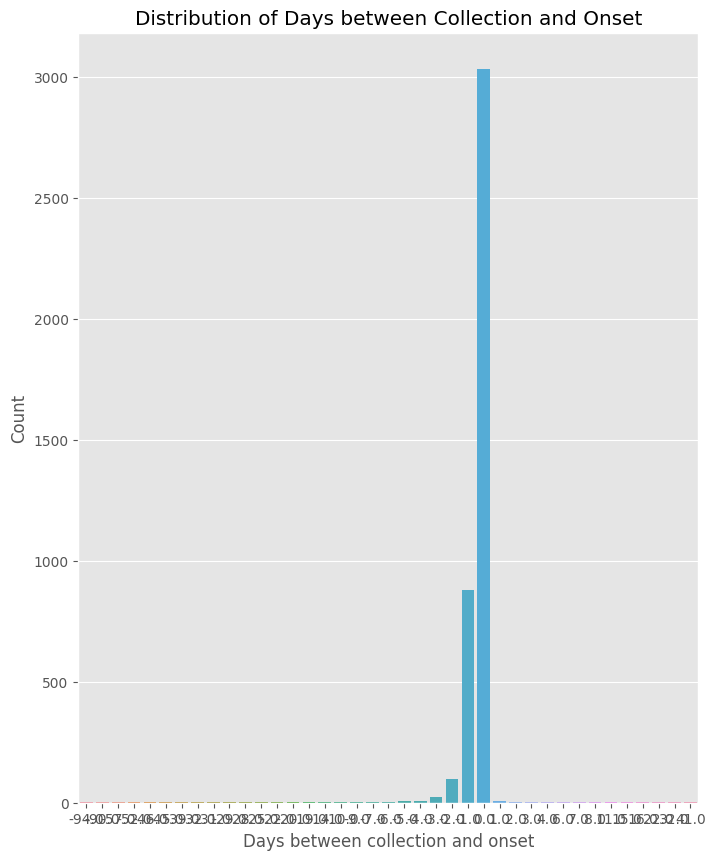

In [74]:
# create a bar chart of the collection_to_onset_interval feature
plt.figure(figsize=(8,10))
sns.countplot(x='collection_to_onset_interval', data=df)
plt.xlabel('Days between collection and onset')
plt.ylabel('Count')
plt.title('Distribution of Days between Collection and Onset')
plt.show()


Creating an age_race feature can potentially provide more information for our analysis and predictions. Age and race are two important demographic factors that have been shown to be associated with COVID-19 outcomes. By combining these two features into one, we can potentially capture more nuanced differences in outcomes among different age and racial groups. This can be useful in identifying disparities in COVID-19 outcomes and designing targeted interventions to address these disparities.

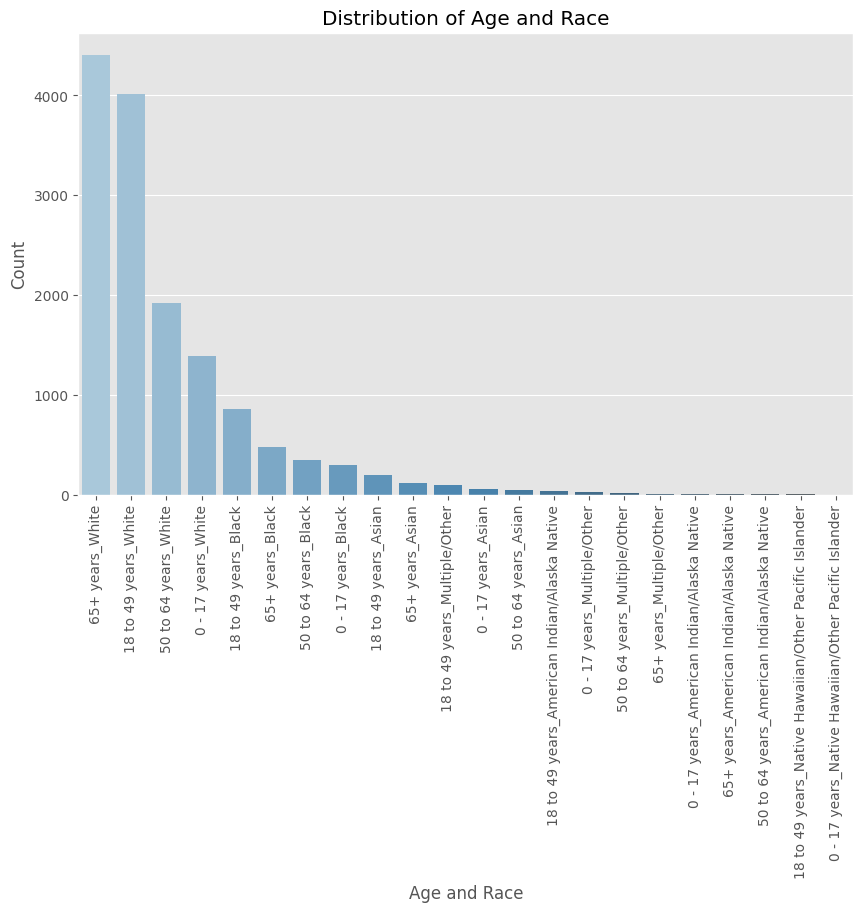

In [75]:
# create a new feature called "age_race"
df["age_race"] = df["age_group"] + "_" + df["race"]

# count the number of occurrences for each age_race category
age_race_counts = df["age_race"].value_counts()

# create a bar plot to visualize the distribution of age_race
plt.figure(figsize=(10,6))
sns.barplot(x=age_race_counts.index, y=age_race_counts.values, palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel("Age and Race")
plt.ylabel("Count")
plt.title("Distribution of Age and Race")
plt.show()


In [76]:
df["age_race"] = df["age_group"] + "_" + df["race"]
df['collection_to_onset_interval'] = df['case_onset_interval'] - df['case_positive_specimen_interval']
df['month'] = pd.to_datetime(df['case_month']).dt.month_name()

# Save the updated dataset as a CSV file
df.to_csv('covid_data_with_new_features.csv', index=False)
